# Case Study 1 : Collecting Data from Twitter

Due Date: September 21, **BEFORE the beginning of class at 6:00pm**

## **NOTE: There are *always* last minute issues submitting the case studies.  DO NOT WAIT UNTIL THE LAST MINUTE!**

* ------------

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/9f/Twitter_bird_logo_2012.svg/220px-Twitter_bird_logo_2012.svg.png">

**TEAM 5 Members:** 

    HARSH NILESH PATHAK
    JIDAPA THADAJARASSIRI
    KRUSHIKA TAPEDIA
    PITCHAYA WIRATCHOTISATIAN
    PRINCE SHIVA CHAUDHARY
    

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](http://www.learndatasci.com/wp-content/uploads/2015/08/Mining-the-Social-Web-2nd-Edition.pdf) 
* The codes for [Chapter 1](http://bit.ly/1qCtMrr) and [Chapter 9](http://bit.ly/1u7eP33)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1: Sampling Twitter Data with Streaming API about a certain topic

* Select a topic that you are interested in, for example, "WPI" or "Lady Gaga"
* Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [2]:
import twitter
import json
import time
#---------------------------------------------
# Define a Function to Login Twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'cwuOhOSiMHaqSjUsyfYRVltuE'
    CONSUMER_SECRET = 'JBZWaPi3ldDHgMo6NPr8MbRKEU2iHBW7xVzL094HjsoX33K4eJ'
    OAUTH_TOKEN ='842632842207203328-cNbwTaG4eW4rbQJwaG4RxtZkHJ51SoO'

    OAUTH_TOKEN_SECRET = 'IhypdlKWPYtpKJ8aWevWTPTyeTbtmffVRGsFcF9hXkQQg'

    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


api = oauth_login()
topics = ['#mac','#hp','#apple','#acer','#dell','#lenovo','#mac']

def search_tweets(topic,count=100):
    raw_tweets = []
    search_results = api.search.tweets(q=topic, count=count)
    statuses = search_results['statuses']
    raw_tweets.extend(statuses)
    oldest = raw_tweets[-1]['id'] - 1
    max_count = 35
    while(len(search_results['statuses'])>0):
            max_count = max_count-1;
            search_results = api.search.tweets(q=topic, count=count,max_id=oldest)
            statuses = search_results['statuses']
            raw_tweets.extend(statuses)
            oldest = raw_tweets[-1]['id'] - 1
            if(max_count==0):
                print(len(raw_tweets))
                break
    return raw_tweets


def write_json(filename,data):
    with open(filename,"w") as outfile:
        json.dump(data,outfile,indent = 4)

for topic in topics:
    print("fetching "+topic+"...")
    write_json("twitter_"+topic+".json",search_tweets(topic))
    time.sleep(1)

    


fetching #mac...
fetching #hp...
2390
fetching #apple...
3283


### Report some statistics about the tweets you collected 

* The topic of interest: ACER


* The total number of tweets collected: 13000

*-----------------------

# Problem 2: Analyzing Tweets and Tweet Entities with Frequency Analysis

**1. Word Count:** 
* Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 words with their counts

In [2]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd
import re,string
import json
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer


Acer_df = pd.read_json("twitter_#acer.json")
Acer_df.head()
tweets = pd.DataFrame(data=Acer_df,columns=['text'])
text = tweets.values.T.tolist()

word_list = []
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

for i in range(0,len(text)):
    for j in range(len(text[i])):
        b = strip_links(text[i][j])
        a = re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?|\s+]', b.lower())
        word_list.extend(a)

p=list(string.punctuation)
stop = stopwords.words('english') + p + ['rt','RT', 'via','https','' ,'12','…'] + list(string.digits)
filter_words = [word for word in word_list if word not in stop]
filter_words[-33:]

keys = Counter(filter_words).keys()
values = Counter(filter_words).values()
c=[]

for a,b in zip(keys,values):
    c.append([a,b])
words_df = pd.DataFrame(data = c, columns = ['Word','Count'])
words_df = words_df.sort_values(['Count'],ascending = False)
words_df[:30]

,Word,Count
4,acer,3219
73,aspire,2146
77,notebook,1078
1542,antonlinecom,1066
135,switch,1048
209,lcd,1038
1208,touchscreen,1036
1543,alpha,1033
1544,staffpick,1031
1545,touchscree…,1030


**2. Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.


In [4]:
#----------------------------------------------
#  Usings Pandas to create the data frame of the main twitter data
# and then picking just the retweet_count and text
load = pd.read_json("twitter_#acer.json")
load = load.sort_values(['retweet_count'],ascending=False)
popular_tweets = pd.DataFrame(data=load,columns=['text','retweet_count'])
#Dropping all the duplicate Values
popular_tweets = popular_tweets.drop_duplicates()
#To look up the top 10 popular retweets
popular_tweets[:10]

,text,retweet_count
1011,"RT @antonlinecom: Acer Aspire Switch Alpha 12""...",1279
1500,"Acer Aspire Switch Alpha 12"" Touchscreen LCD 2...",1279
1779,RT @antonlinecom: ACER Gaming\nhttps://t.co/4v...,1271
1820,ACER Gaming\nhttps://t.co/4vva53USXR\n#acer #p...,1271
122,"RT @RECITONERS: Por que necesitas un ""gran #...",103
1696,"شاهد خصومات ضخمة, وأسعار تبدأ من 699 ريال, عل...",83
356,RT @kae__ato: ミスト７区４６号室\nヘアサロン改装終了！\nトイレも完備したの...,82
1544,ミスト７区４６号室\nヘアサロン改装終了！\nトイレも完備したのでいつでも遊びに来てね(*ﾉ...,82
1930,RT @ayatokura: 【チラ見せ】Windows Mixed Reality対応アプ...,30
1950,【チラ見せ】Windows Mixed Reality対応アプリ開発に関するご質問の多い内容...,30


**3. Find the most popular Tweet Entities in your collection of tweets**

Please plot a table of the top 10 hashtags, top 10 user mentions that are the most popular in your collection of tweets.

In [8]:
from collections import Counter
import itertools

tweet_entities = load['entities']

hashtags = [tweet_entities[i]['hashtags'] for i in range(len(tweet_entities))]
tags = []
for i in range(len(hashtags)):
    for j in range(len(hashtags[i])):
        tags.append(hashtags[i][j]['text'])
        
keys = Counter(tags).keys()
values = Counter(tags).values()

c = []
for a,b in zip(keys,values):
    c.append([a,b])
Hash_df = pd.DataFrame(data = c, columns = ['Hashtag','Count'])
Hash_df = Hash_df.sort_values(['Count'],ascending = False)
Hash_df[:10]

text = []
text = list(load['text'])
user_mentions = []
for i in text:
    user_mentions.append(i.split(" "))

user = []
regex = re.compile('^@')

for i in range(len(user_mentions)):
    for j in range(len(user_mentions[i])):
        if re.match(regex,user_mentions[i][j]):
            user.append(user_mentions[i][j])
users = Counter(user).keys()
count = Counter(user).values()
d = []
for a,b in zip(users,count):
    d.append([a,b])
mentions = pd.DataFrame(data = d,columns=['User Mentions','Count'])
mentions = mentions.sort_values(['Count'],ascending = False)

mentions[:10]

,User Mentions,Count
0,@antonlinecom:,1066
5,@AcerJapan:,80
2,@kae__ato:,70
3,@ayatokura:,33
15,@eBay,24
4,@IntelRussia:,23
10,@blackdragonsBR:,15
8,@IntelJapan:,9
46,@reparamoscompus:,9
14,@KaliMarcum:,7


In [9]:
Hash_df[:10]

,Hashtag,Count
1,acer,1267
235,aspire,1036
414,staffpick,1031
9,Acer,683
269,有頂天7区荘,71
15,エイサー,68
29,ACER,56
26,gaming,47
111,VR,47
11,FC東京,46


* ------------------------

# Problem 3: Getting "All" friends and "All" followers of a popular user in twitter


* choose a popular twitter user who has many followers, such as "ladygaga".
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [11]:
import tweepy

#auth = tweepy.OAuthHandler(..., ...)
#auth.set_access_token(..., ...)

CONSUMER_KEY = 'lESeEaES4kv8ODfMj8nLH2cUZ'
CONSUMER_SECRET ='BSDVF2lbDQdKHmfSXhtNwZgLpY5PqY7WpwO0eaTwwI3VXi8xLY'
OAUTH_TOKEN = '61517477-uP20wtRXQ6acC8Qrl98UdFUIdyAGLPtsnkFS8hAds'
OAUTH_TOKEN_SECRET = 'hP0NTmkUDUoIADVbpJNixBH75ME8ZG80s2cHkgsf27SPD'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth)

In [12]:
follower_ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name="LaurieofMars").pages():
    follower_ids.extend(page)
    
friend_ids = []
for page in tweepy.Cursor(api.friends_ids, screen_name="LaurieofMars").pages():
    friend_ids.extend(page)

ID = follower_ids[0:20]
Name = [api.get_user(id=follower_ids[i]).screen_name for i in range(20)]
df = {'ID':ID, 'Screen name':Name}
follower_df = pd.DataFrame(df)

print(follower_df)

ID = friend_ids[0:20]
Name = [api.get_user(id=friend_ids[i]).screen_name for i in range(20)]
df = {'ID':ID, 'Screen name':Name}
friend_df = pd.DataFrame(df)

print(friend_df)




                    ID      Screen name
0            432957426      BrownSarahM
1           3463088313   RitzenResearch
2             39117082   kristenbrosnan
3            106648720       _prashanth
4           2436306686         DrJessMT
5             43832558          oridori
6            162493907   TriumphantBass
7             16099390        dgoodtree
8           1237109474         HSLavoie
9             15655383        mickuvirk
10           546377461        pinette14
11  910296270358683648  SoonRam76273422
12            17544399        JamesARay
13  910199889438691328  ANGELLRestrepo4
14  910198559001149441  William10407767
15  784337324515614720   AndrewAJJordan
16          3044774477         JMak1225
17           389602055        MikeBouso
18           337503376         PHKoules
19  909973166503718912  Jennife25439434
                    ID      Screen name
0             16099390        dgoodtree
1   789123160578854913     Mass_STEMHub
2            594847411        keskrivan


* Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table

In [13]:
# A table of ids and screen names of 20 mutual friends/followers
friends = set(friend_ids)
followers = set(follower_ids)
mutual = friends.intersection(followers)
len(mutual)

mutual = list(mutual)
ID = mutual[0:20]
Name = [api.get_user(id=mutual[i]).screen_name for i in range(20)]
df = {'ID':ID, 'Screen name':Name}
mutual_df = pd.DataFrame(df)

print(mutual_df)

                    ID      Screen name
0   846335241778352128         lrob0043
1   789123160578854913     Mass_STEMHub
2   708683962827190274       Moho_Disco
3   722429857989271552      k8writesWPI
4   795630741497532420     Teixeira_Lab
5   710873031967514628       MishOnMars
6   755227401513275392       marnibhall
7            555024391          BolekNY
8   828655962529599488    Jiminy_Kirket
9   753663650641088512           wpi_ck
10            49891338            TMMCC
11  746046557548584965  Bogdan4Research
12            18309133      CaseyDreier
13           390440974          SGurska
14          1161545748    LeshinStephen
15            69644318       WPIWSoccer
16          3447795743         WPI_KEEN
17            16287777          jcwiley
18          2730410022         GGCatWPI
19           607272998        Mass_Tech


*------------------------

# Problem 4: Business question 

Run some additional experiments with your data to gain familiarity with the twitter data and twitter API.

* Come up with a business question that Twitter data could help answer.
* Decribe the business case.
* How could Twitter data help a company decide how to spend its resources.

In [14]:
import glob
glob_data = []
for file in glob.glob('data/twitter_#*.json'):
    with open(file) as json_file:
        data = json.load(json_file)

        i = 0
        while i < len(data):
            glob_data.append(data[i])
            i += 1

with open('data/finalFile.json', 'w') as f:
    json.dump(glob_data, f, indent=4)

In [16]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_counter(c,dest,y):
    l = []
    v = []
    for i in c.keys():
        l.append(i)
        v.append(c[i])

    indexes = np.arange(len(l))
    width = 0.5
    # Get current size
    fig1 = plt.gcf()
    fig_size = plt.rcParams["figure.figsize"] 
    # Set figure width to 12 and height to 9
    fig_size[0] = 30
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.bar(indexes, v, width,color='y')
    plt.xticks(indexes + width * 0.5, l)
    plt.ylabel(y)
    plt.show()
    fig1.savefig(dest,dpi=300)
    
    
def plot_topN(counter,dest,y_label):
    l = []
    v = []
    for i in range(0,len(counter)):
        l.append((counter[i][0]))
        v.append(counter[i][1])

    indexes = np.arange(len(l))
    width = 0.5
    fig1 = plt.gcf()
    # Get current size
    fig_size = plt.rcParams["figure.figsize"] 
    # Set figure width to 12 and height to 9
    fig_size[0] = 50
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    plt.bar(indexes, v, width,color='y')
    plt.xticks(indexes + width * 0.5, l)
    plt.ylabel(y_label)
    plt.show()
    fig1.savefig(dest,dpi=300)


In [15]:
import pandas as pd
import re
from collections import Counter

#area vs tweets
df = pd.read_json('data/twitter_topics_v3.json')
areas_acer = []
areas_apple = []
areas_len= []
areas_dell = []
areas_hp =[]
brands = ['acer','apple','lenovo','hp','dell']
for i in range(0,df.shape[0]):
    b =  str(df['text'][i]).lower()
    if brands[0] in b:
        a  = df['user'][i]
        areas_acer.append(a['time_zone'])
    if brands[1] in b:
        a  = df['user'][i]
        areas_apple.append(a['time_zone'])
    if brands[2] in b:
        a  = df['user'][i]
        areas_len.append(a['time_zone'])
    if brands[3] in b:
        a  = df['user'][i]
        areas_hp.append(a['time_zone'])
    if brands[4] in b:
        a  = df['user'][i]
        areas_dell.append(a['time_zone'])
        




In [17]:
c0 = Counter(areas_apple).most_common(5) #700
c1 = Counter(areas_acer).most_common(5) #120
c2 = Counter(areas_dell).most_common(5) #280
c3 = Counter(areas_len).most_common(5) #250 
c4 = Counter(areas_hp).most_common(5) #350



In [18]:
def plot_topNew(counter,dest,y_label):
    l = []
    v = []
    for i in range(0,len(counter)):
        if (len(counter[i][0].split())>1):
            name = counter[i][0].split()[0] +' '+counter[i][0].split()[1]
        else:
            name=counter[i][0]
        l.append(name)
        v.append(counter[i][1])

    indexes = np.arange(len(l))
    width = 0.5
    fig1 = plt.gcf()
    # Get current size
    fig_size = plt.rcParams["figure.figsize"] 
    # Set figure width to 12 and height to 9
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.bar(indexes, v, width,color='y')
    plt.xticks(indexes + width * 0.5, l)
    plt.ylabel(y_label)
    plt.show()
    fig1.savefig(dest,dpi=400)

In [19]:
v0 = sorted(Counter(areas_apple).values())[-3:-1]
v1 = sorted(Counter(areas_acer).values())[-3:-1]
v2 = sorted(Counter(areas_dell).values())[-3:-1]
v3 = sorted(Counter(areas_len).values())[-3:-1]
v4 = sorted(Counter(areas_hp).values())[-3:-1]
v0,v1,v2,v3,v4

([215, 685], [98, 122], [203, 291], [85, 243], [331, 331])

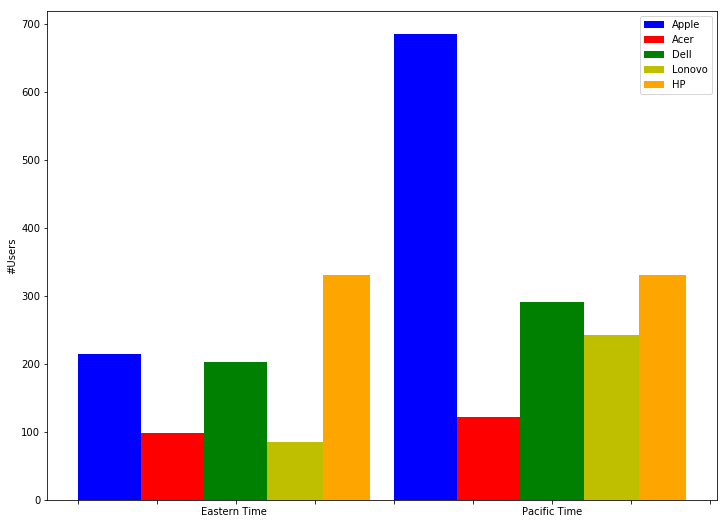

In [55]:
def plot_topNewn(v0,v1,v2,v3,v4,dest,y_label):
    l = [ 'Eastern Time' , 'Pacific Time' ]
    brands = ['apple','acer','dell','lenovo','hp']
    
    x = np.arange(len(l))
    width = 0.5
    fig1 = plt.gcf()
    # Get current size
    fig_size = plt.rcParams["figure.figsize"] 
    # Set figure width to 12 and height to 9
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    ax = plt.subplot(111)
    r1=ax.bar(x-0.4, v0,width=0.2,color='b',align='center',label='apple')
    r2=ax.bar(x-0.2, v1,width=0.2,color='r',align='center',label='acer')
    r3=ax.bar(x, v2,width=0.2,color='g',align='center',label='dell')
    r4=ax.bar(x+0.2, v3,width=0.2,color='y',align='center',label='lenovo')
    r5=ax.bar(x+0.35, v4,width=0.15,color='orange',align='center',label='hp')
    ax.legend((r1[0], r2[0],r3[0],r4[0],r5[0]), ('Apple', 'Acer','Dell', 'Lonovo','HP'))
    ax.set_ylabel(y_label)
    ax.set_xticklabels([' ',' ','','Eastern Time ',' ',' ',' ','Pacific Time',' ',' '])
    plt.show()
    fig1.savefig(dest,dpi=300)

plot_topNewn(v0,v1,v2,v3,v4,'area_tweet_all','#Users')

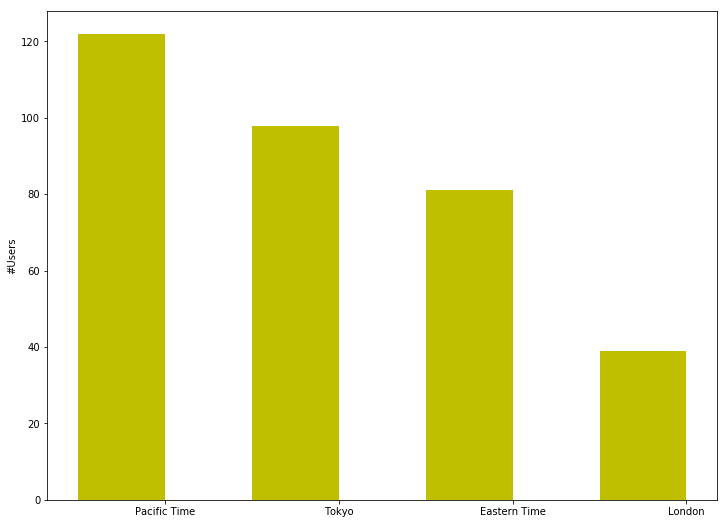

In [99]:
plot_topNew(c1[1:],'area_tweet_acer','#Users')

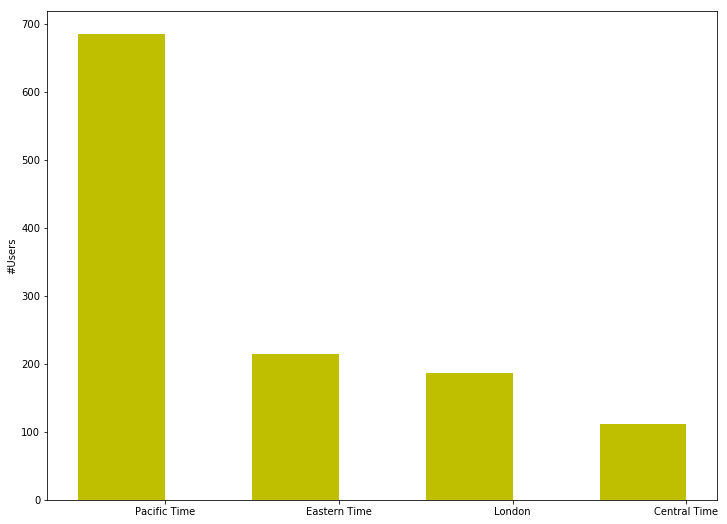

In [84]:
plot_topNew(c0[1:],'area_tweet_apple','#Users')

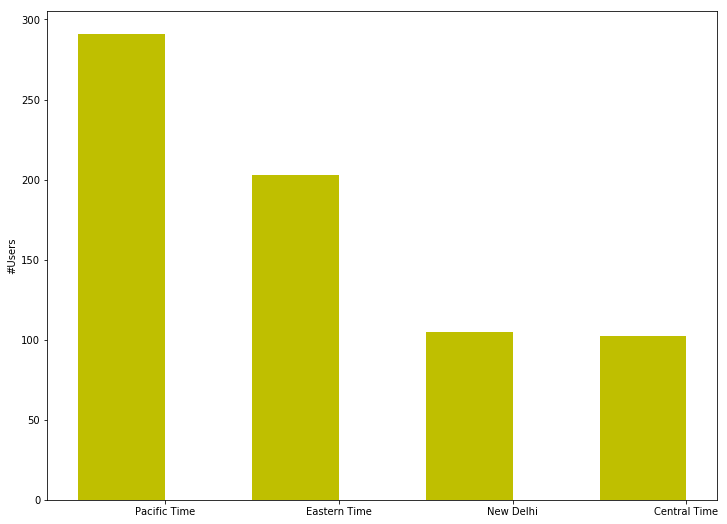

In [85]:
plot_topNew(c2[1:],'area_tweet_dell','#Users')

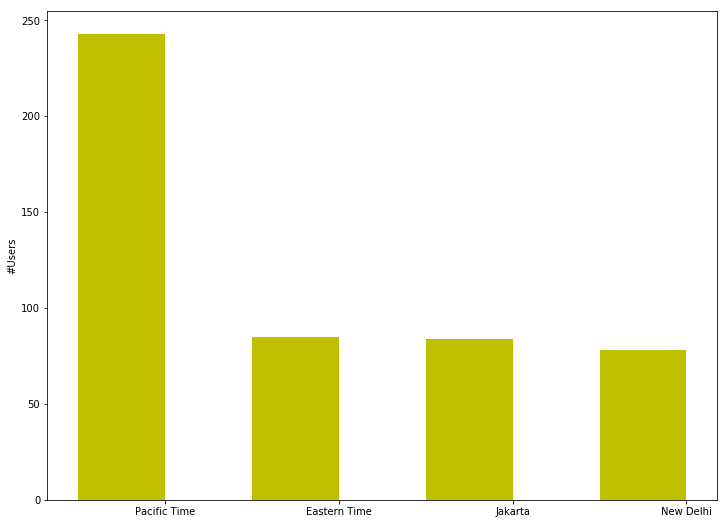

In [86]:
plot_topNew(c3[1:],'area_tweet_lenovo','#Users')

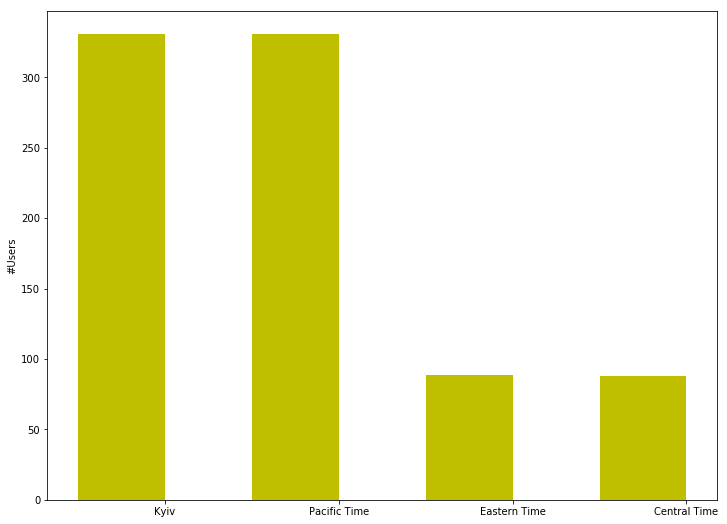

In [87]:
plot_topNew(c4[1:],'area_tweet_hp','#Users')

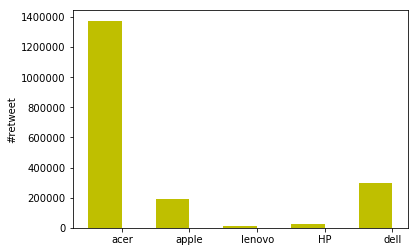

In [20]:
#retweets per brand
retweet_acer = 0
retweet_apple = 0
retweet_hp = 0
retweet_dell = 0
retweet_len = 0
for i in range(0,df.shape[0]):
    b =  str(df['text'][i]).lower()
    if brands[0] in b:
        a  = df['retweet_count'][i]
        retweet_acer = retweet_acer + a
    if brands[1] in b:
        a  = df['retweet_count'][i]
        retweet_apple = retweet_apple + a
    if brands[2] in b:
        a  = df['retweet_count'][i]
        retweet_len = retweet_len + a
    if brands[3] in b:
        a  = df['retweet_count'][i]
        retweet_hp = retweet_hp + a
    if brands[4] in b:
        a  = df['retweet_count'][i]
        retweet_dell = retweet_dell + a
b = Counter(acer = retweet_acer,apple=retweet_apple,lenovo=retweet_len,HP=retweet_hp,dell=retweet_dell)
plot_counter(b,'brand_retweet','#retweet')

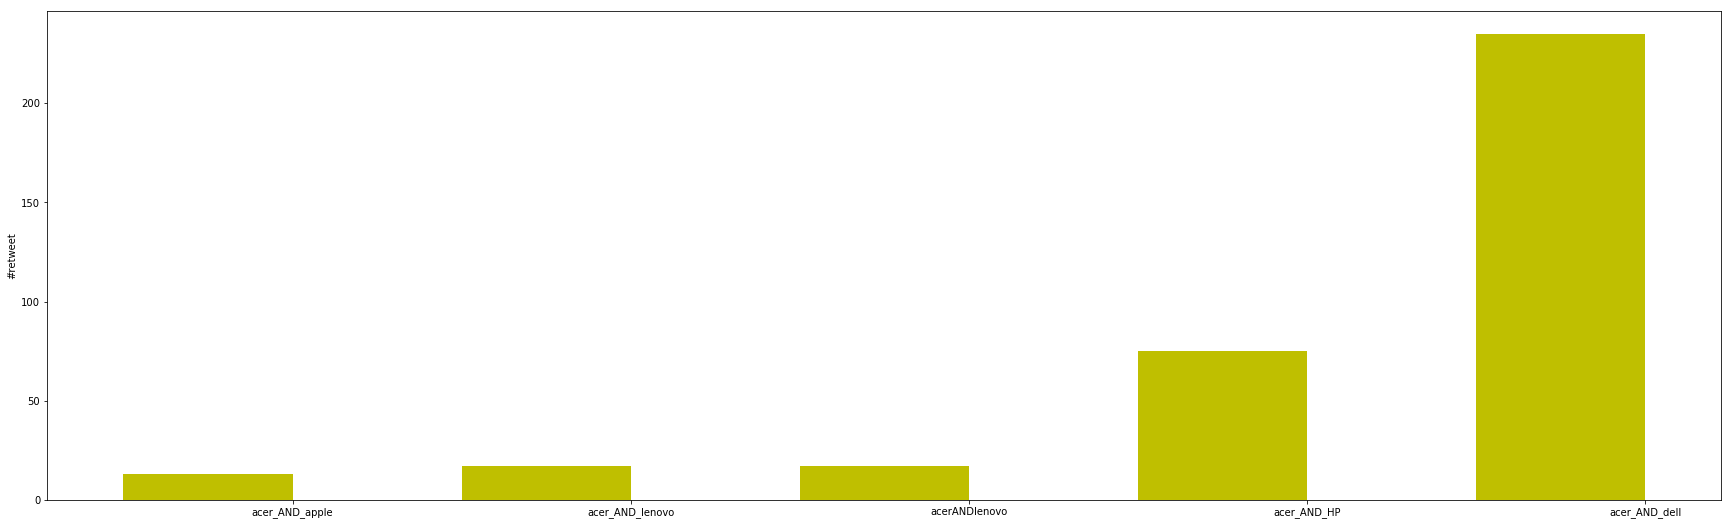

In [42]:
#retweets per 2 brand
retweet_apple = 0
retweet_len = 0
retweet_hp = 0
retweet_dell = 0

for i in range(0,df.shape[0]):
    b =  str(df['text'][i]).lower()
    if brands[0] in b and brands[1] in b:
        a  = df['retweet_count'][i]
        retweet_apple = retweet_apple + a
    if brands[0] in b and brands[2] in b :
        a  = df['retweet_count'][i]
        retweet_len = retweet_len + a
    if brands[0] in b and brands[3] in b:
        a  = df['retweet_count'][i]
        retweet_hp = retweet_hp + a
    if brands[0] in b and brands[4] in b:
        a  = df['retweet_count'][i]
        retweet_dell = retweet_dell + a
b = Counter(acer_AND_apple = retweet_apple,acer_AND_lenovo=retweet_len,acerANDlenovo=retweet_len,acer_AND_HP=retweet_hp,acer_AND_dell=retweet_dell)
plot_counter(b,'acerLap','#retweet')

In [43]:
from datetime import time

morning_start = time(6)
morning_end = time(12)
afternoon_start = time(13)
afternoon_end = time(17)
evening_start = time(18)
evening_end = time(22)
night_start= time(23)
night_end= time(5)
df['time_of_day'] = df['created_at'].apply(lambda x: x.time())
df['time_of_day']

df['morning'] = (df['time_of_day'] >= time(8,0)) & (df['time_of_day'] <= time(12,0))
df['afternoon'] = (df['time_of_day'] >= time(12,1)) & (df['time_of_day'] <= time(17,0))
df['evening'] = (df['time_of_day'] >= time(17,1)) & (df['time_of_day'] <= time(20,0))
df['night'] = (df['time_of_day'] >= time(20,1)) & (df['time_of_day'] <= time(23,59))
df['late_night'] = (df['time_of_day'] >= time(0,1)) & (df['time_of_day'] <= time(8,0))

# periods = {'morning':[morning_start, morning_end], 'evening':[evening_start, evening_end],'night':[night_start,night_end],'afternoon':[afternoon_start,afternoon_end]}
# for k, v in periods.items():
#     df['periods'] = np.where(((v[0].hour <= df['created_at'].apply(lambda x: x.hour)) & (df['created_at'].apply(lambda x: x.hour) <= v[1].hour)), k, 'unknown_period')
# df['periods']

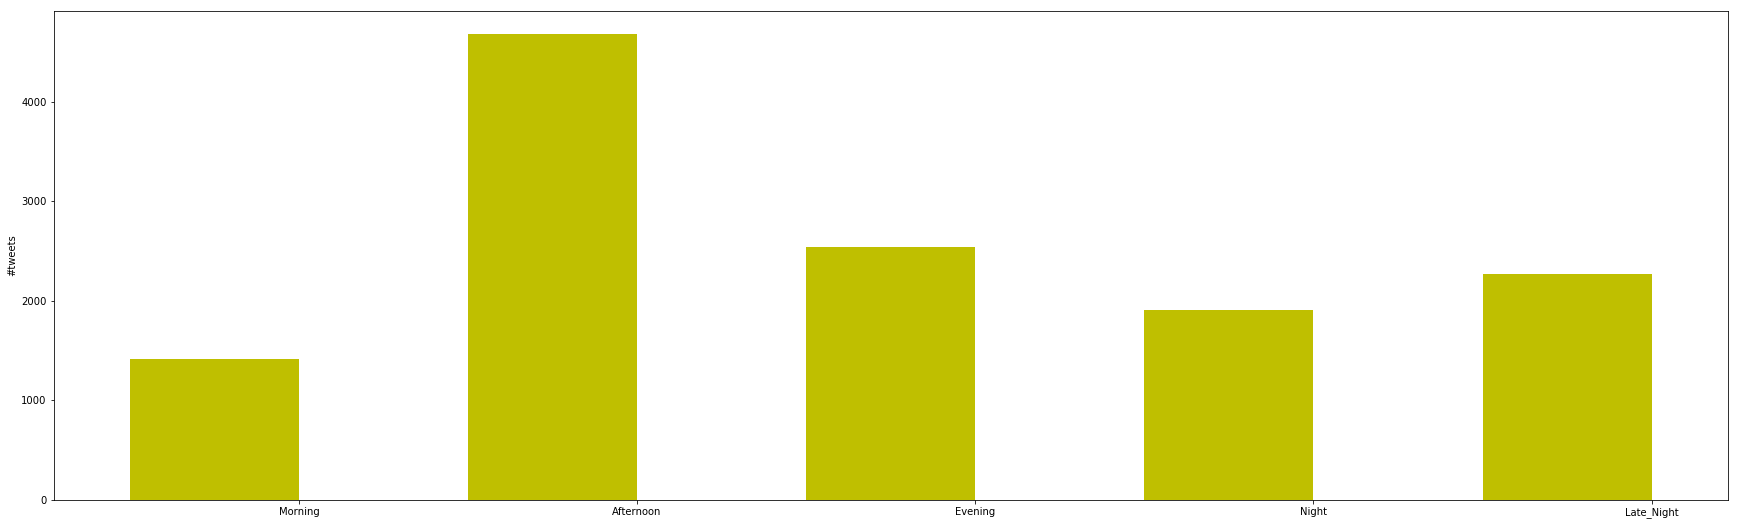

In [44]:
v = [Counter(df['morning'] == True)[1],Counter(df['afternoon'] == True)[1],Counter(df['evening'] == True)[1],Counter(df['night'] == True)[1],Counter(df['late_night']==True)[1]]
period = Counter(Morning=v[0],Afternoon=v[1],Evening=v[2],Night=v[3],Late_Night=v[4])
period.keys()
plot_counter(period,'survey_time.png','#tweets')

In [23]:
dat=df
for i in range(len(dat.text)):
    dat.loc[i,'text']=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",dat.loc[i,'text']).split())
    dat.loc[i,'text']=dat.loc[i,'text'].lower()
    #file.write(dat.loc[i,'text'])
#file.close() 
text=dat['text']
text.head()

0                                                   hp
1    handmade slytherin clock in wood inspired by t...
2    hp made an even more powerful vr backpack but ...
3                                          omg love hp
4    rt always fun to watch the 9 min long self cal...
Name: text, dtype: object

In [25]:
# The compound score is computed by summing the valence scores of each word in the lexicon, 
#adjusted according to the rules, and then normalized to be between -1 (most extreme negative) 
#and +1 (most extreme positive). This is the most useful metric if you want a single 
#unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, 
#weighted composite score' is accurate.
# It is also useful for researchers who would like to set standardized thresholds for 
#classifying sentences as either positive, neutral, or negative. Typical threshold values 
#(used in the literature cited on this page) are:
#positive sentiment: compound score >= 0.5
#neutral sentiment: (compound score > -0.5) and (compound score < 0.5)
#negative sentiment: compound score <= -0.5
# The pos, neu, and neg scores are ratios for proportions of text that fall in each category 
#(so these should all add up to be 1... or close to it with float operation). 
#These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

# Give each text sentimental scores
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import twython
nltk.download('vader_lexicon')
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sslist = [dict.fromkeys(['compound','neg','neu','pos']) for x in range(len(text))] # a list of sentimental score 
sstype = [None]*len(text) # a list of sentimental type: positive, negative, or neutral
for i in range(len(text)):
    print(i,text[i])
    ss = sid.polarity_scores(text[i])
    sslist[i]['compound'] = ss['compound']
    sslist[i]['neg'] = ss['neg']
    sslist[i]['neu'] = ss['neu']
    sslist[i]['pos'] = ss['pos']
    # classify ss
    if ss['compound']>=0.5: 
        sstype[i]='positive'
    elif ss['compound']<=-0.5:
        sstype[i]='negative'
    else:
        sstype[i]='neutral'
    # Print result
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harsh/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/harsh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
0 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1 handmade slytherin clock in wood inspired by the harrypotter books sale hp worldwideshipping
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
2 hp made an even more powerful vr backpack but it s not for gaming
compound: 0.2609, neg: 0.0, neu: 0.854, pos: 0.146, 
3 omg love hp
compound: 0.6369, neg: 0.0, neu: 0.323, pos: 0.677, 
4 rt always fun to watch the 9 min long self calibration of the hp 8591a spectrumanalyzer before i so some measurements on the pa
compound: 0.5106, neg: 0.0, neu: 0.864, pos: 0.136, 
5 pagani zonda paganizonda hp hpbarchetta barchetta zondahp zondahpbarchetta paganizondahp paganizondahpba
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6 pagani zonda paganizonda hp hpbarche

compound: 0.34, neg: 0.0, neu: 0.821, pos: 0.179, 
129 rt id sewa mobil lepas kunci hp 081277334847 nadyra rental mobil batam barelang laziomilan seangelael
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
130 rt id ahlinya sedot wc amp service mampet di batam hp 081372150633 batam barelang luarbiasa sedotwc la
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
131 rt parce que j avais envie de gribouiller hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
132 0 new ok hp
compound: 0.296, neg: 0.0, neu: 0.476, pos: 0.524, 
133 hp 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
134 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
135 klo bisa hindari simpan hp kamu dalam saku celana radiasinya cukup tinggi masbro tipssehat infosehat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
136 hp 17 3 y067ng amd dual core a9 9410 apu 8gb ram 1tb hdd amd radeon r3 ebay hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
137 best laptop deals on apple hp dell and more of the week s tech sales laborday
compound: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
296 hp sprocket pocket sized photo printer launched hp hppocketsizephotoprinter hpmobiles photoprinter hydreabad
compound: 0.128, neg: 0.0, neu: 0.88, pos: 0.12, 
297 0 new ok hp
compound: 0.296, neg: 0.0, neu: 0.476, pos: 0.524, 
298 hp 50
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
299 hp x2 10 p000ng 25 7 cm 10 1 inch wxga ips notebook 2in1 convertible laptop ebay hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
300 hp comedy club
compound: 0.3612, neg: 0.0, neu: 0.444, pos: 0.556, 
301 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
302 rt jmm y usted se or que es un hp honorable pol tico y gran despojador de tier
compound: 0.5423, neg: 0.0, neu: 0.811, pos: 0.189, 
303 wow thanks hp my computer kept showing a black screen but when i turned it on it worked fine so i had to reset my entire computer
compound: 0.6757, neg: 0.0, neu: 0.762, pos: 0.238, 
304 rt 4th gen z series workstations launched by hp
compound: 0.128, neg: 0.0, neu: 0

482 rt hp takes work beyond the office with new elite 1000 series tech radar pro hp keepreinventing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
483 v is a hablar de lo realmente importante o todav a est is con el cazo puesto hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
484 if any users suffering of black screen after login disable appreadiness dll in services task manager gt explorer exe bug hp
compound: -0.25, neg: 0.128, neu: 0.785, pos: 0.087, 
485 hp harrypotter harrypotterworld hogwarts lovegryffindor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
486 hp spectre x360 conv energy star 13 4118nr i5 8gb ram 256gb win 10 396 only 2h 49m
compound: 0.7096, neg: 0.0, neu: 0.731, pos: 0.269, 
487 totally shocked with this new laptop customerservice please contact this laptop is being sent back new laptop not hp
compound: -0.0754, neg: 0.118, neu: 0.777, pos: 0.105, 
488 mantenimiento y reparaci n de flex de pantalla da ado en laptop hp pavilion g7 que fue sometida a duras co
compound

609 the maraton has begun hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
610 alargamos la vida de tus cartuchos hp canon en5minutos gt gt dr cartucho porsolobs9000 n c
compound: 0.4939, neg: 0.0, neu: 0.741, pos: 0.259, 
611 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
612 rt hp intel smartretail
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
613 dyno dynocom chassisdyno mobiledyno torque horsepower hp diesels rollingcoal stainless
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
614 looking for hp magic in london don t miss the wb studio tour harrypotter
compound: -0.1531, neg: 0.118, neu: 0.882, pos: 0.0, 
615 hp launched compact photo printer
compound: 0.128, neg: 0.0, neu: 0.727, pos: 0.273, 
616 looking for sweet deals on the best brands of refurbished computer hardware like dell hp ibm sun cisco and more we got you
compound: 0.8658, neg: 0.0, neu: 0.673, pos: 0.327, 
617 hp zgotowa o bardzo niemi niespodziank posiadaczom wielu serii ich drukarek hardware printers
compound: 0.0,

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
802 rt zamie ci am nowy rozdzia zapraszam harrypotter hp wrzesniowefolllowspree 100pytan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
803 rt zamie ci am nowy rozdzia zapraszam harrypotter hp wrzesniowefolllowspree 100pytan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
804 rt zamie ci am nowy rozdzia zapraszam harrypotter hp wrzesniowefolllowspree 100pytan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
805 rt workstation hp z prezzo e caratteristiche della nuova linea digitalic computer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
806 rt zamie ci am nowy rozdzia zapraszam harrypotter hp wrzesniowefolllowspree 100pytan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
807 rt zamie ci am nowy rozdzia zapraszam harrypotter hp wrzesniowefolllowspree 100pytan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
808 por si se ofrecen 310 hp cupra r seat racing parece cupracer en iaa internationale
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
809 zamie ci a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
966 sr noc technician io austin tx dhcp dns hp
compound: 0.3612, neg: 0.0, neu: 0.762, pos: 0.238, 
967 rt 5 ac adapters power cord chargers laptop computer hp chicony delta amp extras acadapters h
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
968 rebecalebetkevicius racista fuera d ecuador ladyespumilla rebecaespumilla ecuadorserespeta espumilla respeto hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
969 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
970 rt mystic my sister just said hogsworth instead of hogwarts help me i m living with muggles harrypotter muggles hogwarts hp
compound: 0.4019, neg: 0.0, neu: 0.87, pos: 0.13, 
971 harry potter snape patronus always wizard wizarding hp hogwarts toddler tee etsy hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
972 midnight works official hp midnightworks official hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
973 rt bhaskar pocketsizedprinter hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1089 memoria ram hpe rdimm single 8gb 2133mhz ddr4 hp 726718 b21
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1090 hp volta a bloquear cartuchos de tinta gen ricos em impressoras da marca
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1091 otin iltapalaksi kahvin ja j tel silti v sytt alkaa olemaan p iv ll mittaa koblenz hp 3dscan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1092 hp integrity superdome 2 sd2 16s server config ah337a am253a ah340a ah338a flagshiptech
compound: 0.3818, neg: 0.0, neu: 0.809, pos: 0.191, 
1093 high quality media for low prices check it out here printer paper hp cad technical
compound: -0.2732, neg: 0.13, neu: 0.87, pos: 0.0, 
1094 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1095 rt parce que j avais envie de gribouiller hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1096 cms temple otera jinjya hp imp works
compound:

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1220 servidor ml30 hp proliant disponible en nuestra tienda online
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1221 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1222 golem eliteone 1000 hps all in one pc mit austauschbarem 34 zoll curved display hp qbizit golem it
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1223 eliteone 1000 hps all in one pc mit austauschbarem 34 zoll curved display hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1224 much congrats on you bmw m3 600 hp please do not try to race with him
compound: 0.6908, neg: 0.0, neu: 0.711, pos: 0.289, 
1225 apparently i m just stupid but i do learn and as such will never purchase hp again
compound: -0.296, neg: 0.145, neu: 0.855, pos: 0.0, 
1226 whats left of hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1227 for all creatives who needs an insane amount of power hp got your back with the z8 mount over 3tb of ram
compound: -0.4019, neg: 0.114, neu: 0.886, pos: 0.0, 
1228 poc

1376 jarirbookstore buy hp printer dj ia 1115 and get 50 discount offer valid until 09 oct 2017
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1377 hp blocks third party ink with printer firmware update again
compound: 0.2023, neg: 0.151, neu: 0.635, pos: 0.214, 
1378 rt buy hp printer dj ia 1115 and get 50 discount offer valid until 09 oct 2017
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1379 buy hp printer dj ia 1115 and get 50 discount offer valid until 09 oct 2017
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1380 hp elitebook x360 1020 g2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1381 hp elitebook x360 1020 g2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1382 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1383 rt fred weasley fred weasley harrypotter hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1384 ubc 11 4 38 032 255 00 66 38 032 242 1881 ubc club acer hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1385 hp z8 g4 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1386

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1573 rt q amp q campaign at suraj fs nandrampur bas rewari goodfuelpromise hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1574 hp brings 3dprinting to bear in reinventing the footwear shopping experience
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1575 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1576 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1577 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1578 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1579 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1580 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1581 cartuchos recarreg veis na impressora hp officejet pro 8600 plus officejet8600 hp8600 bulkink ecotank print
c

1697 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1698 hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1699 meus novos beb s tattoo tatuagem tatuagens tattoos hp harrypotter chap useletor
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1700 rt coming soon heritage headphones all premium materials klipsch heritage hp 3 headphones legendarysound
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1701 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1702 shots fired to his main bitxh cuz that hoe still pressed lame hp bitxh
compound: -0.7506, neg: 0.348, neu: 0.652, pos: 0.0, 
1703 rt abangan sa ang aking interview kay during the hp salon opening lovingintandem litspecia
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1704 rt a wor e freerol s r x s hp rt rol https
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1705 rt integration with hp operation manager and or servicenow hp splunk
compound: 0.0, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1862 hp news virtual reality machine learning and design needs spark reinvention of hp z workstations hp
compound: 0.2263, neg: 0.0, neu: 0.881, pos: 0.119, 
1863 starting the day with a butterbeer frappaccino today s gonna be a good day hp
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
1864 soluci n limpia cabezales para epson y hp slc limpiacabezal solicita tu pedido por
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1865 welcome to our new followers hope you are having a good week accountants hp lease
compound: 0.8316, neg: 0.0, neu: 0.556, pos: 0.444, 
1866 hp unveils its insanely upgradeable z class workstations
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1867 site reliability engineer nyc hadoop hp icinga
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1868 hp presentara sus nuevos equipos en c print2017
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
1869 rt india asha worker travels on mountainous terrain in hp to carry measles r

compound: 0.128, neg: 0.146, neu: 0.644, pos: 0.21, 
1997 rt uk the threat is here you are the target is your business ready security iot cyberattacks hp
compound: 0.128, neg: 0.146, neu: 0.644, pos: 0.21, 
1998 rt uk the threat is here you are the target is your business ready security iot cyberattacks hp
compound: 0.128, neg: 0.146, neu: 0.644, pos: 0.21, 
1999 the threat is here you are the target is your business ready security iot cyberattacks hp
compound: 0.128, neg: 0.16, neu: 0.61, pos: 0.23, 
2000 imkbg nl alctl hp de devam gelmi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2001 save qr350 when you buy hp 15 bs008ne laptop from jarir
compound: 0.4939, neg: 0.0, neu: 0.758, pos: 0.242, 
2002 free month hp ink sign up and spend less for more ad gt
compound: 0.6887, neg: 0.0, neu: 0.66, pos: 0.34, 
2003 our team keeping one step ahead of the digital curve with a training day on the latest tech innovations at hp s ama
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2004 hp
compound

compound: 0.0516, neg: 0.094, neu: 0.804, pos: 0.103, 
2163 hp proliant bl660c gen8 10gb 20gb e5 4600v2 2 4ghz 6c 95w psu blade server for sale amp rent in uae
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2164 hp proliant dl160 g6 server 2x xeon x5650 six core 2 66 ghz 16 gb ram 2x 1000 gb sata buy sell in uae
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2165 
compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
2166 rt q amp q campaign at suraj fs nandrampur bas rewari goodfuelpromise hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2167 it hp acer hololens ar cr mr sr vr
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2168 sale hp compaq 8300 elite pc desktop intel i5 4gb wlan win 10 im sehr guten
compound: 0.5859, neg: 0.0, neu: 0.798, pos: 0.202, 
2169 hp nokia sonyericsson jadul
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2170 rt twitter fb hp sn
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2171 rt just been to to buy hp printer ink ended up buying a new canon 3 in 1 printer for 15 le

2322 hp presenta ultrabook e 2 in 1 della gamma top elitebook keynote17 iphone8 wwdc17 ios11 iphonex apple
compound: 0.2023, neg: 0.0, neu: 0.878, pos: 0.122, 
2323 hp eliteone 1000 pc all in one modulare con schermo intercambiabile keynote17 iphone8 wwdc17 ios11 iphonex
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2324 27 ranked players in the updated rankings weareloaded hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2325 hogwarts foldable umbrella hp harrypotter hogwarts
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2326 tokyo game show 2017 omen by hp omen hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2327 servicios con el respaldo de hp brindamos soluciones en materia de impresi n para usted y su empresa
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2328 rt xevi jonathanbanks on stage at hpreinvent17 thefixer thewolf hp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2329 rt fan total de las 7 personas con personalidad que est n viendo ahora un periscope de hp
compound: 0.3182

compound: -0.8074, neg: 0.448, neu: 0.552, pos: 0.0, 
2447 over 35 off this apple ipad 4 tablet 16gb get it today with free shipping dealoftheday
compound: 0.5106, neg: 0.0, neu: 0.809, pos: 0.191, 
2448 wpgroupbuy theme clickbank android apple file instagram
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2449 iphonex apple tkg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2450 rt september 19 ios 11 release time in your time zone riyadh tuesday 20 00 ios11 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2451 masaki yoda on apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2452 apple iphone iphonex iphonexbox iphonexpackaging this iphone x box looks nice but isn t something special
compound: 0.6652, neg: 0.0, neu: 0.688, pos: 0.312, 
2453 september 19 ios 11 release time in your time zone riyadh tuesday 20 00 ios11 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2454 this year s iphones are the first to have only two storage options since the iphone 3g in 2008 via r apple appl

compound: 0.5267, neg: 0.0, neu: 0.855, pos: 0.145, 
2614 apple iphone 5s 16gb sealed smartphone straight talk total 4g lte you pick
compound: 0.2263, neg: 0.0, neu: 0.863, pos: 0.137, 
2615 so hate to be one of those guys having an iphonex opinion but just thought that having this on their site is
compound: -0.3604, neg: 0.106, neu: 0.894, pos: 0.0, 
2616 rt apple wood slices sanded wood slices 1 3 inch craft supply by truewilderness via
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2617 rt apple wood slices sanded wood slices crafts 1 2 inch handmade supply by truewilderness v
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2618 rt apple wood slices sanded wood slices 1 4 inch handmade craft supply woodworking via
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2619 rt 1 800 273 8255 owen featuring and available on roblox pandora apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2620 apple s new counselor will teach siri how to have serious conversations via artificialintelligence
comp

compound: 0.6808, neg: 0.0, neu: 0.517, pos: 0.483, 
2756 rt apple iphone x review with specs video apple iphone iphonex appleiphonex iphonexreview ip
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2757 ios11 gets released tuesday i ve been using the beta for a few months amp it s awesome new features here apple
compound: 0.6249, neg: 0.0, neu: 0.814, pos: 0.186, 
2758 rt iphone x trailer apple video apple iphonex appleiphonex iphonextrailer iphonexofficialtr
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2759 m sica y conexi n lte protagonistas del nuevo anuncio del apple watch 3 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2760 rt newz spiced apple pie mini loaves vegan
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2761 rt facial recognition threat to our lives or a tool to simplify our lives lgbt apple asmsg via
compound: -0.5267, neg: 0.175, neu: 0.825, pos: 0.0, 
2762 rt colors keyboard cover in pink get yours now kbcovers keyboardskin protectyourlaptop pink apple macbookpro 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2910 rt quand tu passe devant un apple store le jour de la sortie du nouvel iphone appleevent iphone8 iphonex apple applesto
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2911 rt jeu rt follow pour tenter de gagner un ipad mini 10 de remise sur apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2912 bungalow on the beach is out now streaming everywhere might i add lend me your ears new music coming
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2913 i uploaded a new episode 27 apple does it again on spreaker apple hackitout iphone iphone8 iphonex
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
2914 try this recipe this weekend it s a great pudding after a dinner party cake apple
compound: 0.7783, neg: 0.0, neu: 0.618, pos: 0.382, 
2915 rt apple launched faceid security feature meanwhile in kanpur beta aisa muh todenge ki zindagi bhar tumra iphonwa lock hi
compound: 0.4404, neg: 0.0, neu: 0.822, pos: 0.178, 
2916 cry to you corporate masters a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3094 scary thought apple faceid could be a powerful tool for mass spying government facial
compound: -0.1027, neg: 0.188, neu: 0.647, pos: 0.165, 
3095 masaki yoda on apple musique japon information
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3096 rt time for a snack go ahead bite an apple while you are at it check out the app
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3097 rt time for a snack go ahead bite an apple while you are at it check out the app
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3098 this is what i m getting at now we have the ability to summon whatever possible tool you need to survive then swipe left apple android
compound: 0.3182, neg: 0.0, neu: 0.909, pos: 0.091, 
3099 bitcoin in the browser google apple and more adopting crypto compatible api apple google
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3100 iphonex home via apple iphone
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3101 rt time for a snack go ahe

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3258 there definitely is a serious issue awful yahoo and apple iphone ipad
compound: -0.1531, neg: 0.287, neu: 0.533, pos: 0.18, 
3259 rt parece que siri entendi la referencia iphone apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3260 watch me play byte on gamer iamlexgotti ipadpro apple btye
compound: 0.34, neg: 0.0, neu: 0.789, pos: 0.211, 
3261 ios11 de apple en appleevent recuerda que puedes cambiar toda la informaci n a tu iphone siguemeytesigo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3262 privacy apple iphonex facialrecognition faceid
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3263 rt el sue o de steve jobs hecho realidad para mas de 12 000 empleados apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3264 apple ipad pro 128gb wi fi cellular unlocked 9 7in space gray grade a r
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3265 samsunggalaxys8 apple totally convinced me this year that i should stick with android samsung i 

3378 ebay apple iphone 4s 16gb black at amp t smartphone mc918ll a apple iphone ios
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3379 ebay apple iphone 7 128gb rose gold faulty spares amp repairs good condition apple iphone
compound: 0.1531, neg: 0.134, neu: 0.698, pos: 0.169, 
3380 est s pensando comprar el iphone x este video es para ti apple iphonex precioiphonex
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3381 rt getting ready for gopro iphone apple airpods samsung galaxy s7edge applewatch 360 vr caffeinegaming e
compound: 0.3612, neg: 0.0, neu: 0.848, pos: 0.152, 
3382 16gb ipad mini for sale depop apple ipadmini ipad selling
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3383 10 000 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3384 the iphone x notch is all about branding via r apple apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3385 getting ready for gopro iphone apple airpods samsung galaxy s7edge applewatch 360 vr caffeinegaming
compound: 0.3612, neg: 0.0, neu: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3523 rt iphone x il nuovo death note la vera potenza del processore a11bionic apple iphonex
compound: -0.5994, neg: 0.231, neu: 0.769, pos: 0.0, 
3524 rt where apple leads its competitors typically follow iphone8 and iphonex now with wirelesscharging capabilities apple t
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3525 are you bullish or bearish on apple start trading aapl with bitcoin cryptocurrency stocks qqq
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3526 apple files for new trademarks covering superretina in the u s amp faceid in europe
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3527 an apple treat for your dog give them a petsmile follow
compound: 0.4019, neg: 0.0, neu: 0.769, pos: 0.231, 
3528 rt rt j ai adress un courrier au pdg de apple pour le f liciter de la sortie son nouvel iphone croix h
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3529 it might finally be time to buy an apple watch iphone apple
compound: 0.0, neg: 0.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3679 rt modo 15 de septiembre activado apple tambi n esta lista para dar el grito las vegas
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3680 apple marketing automation amp email marketing for beginners
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3681 apple defends safari ad blocking says people have a right to privacy rt newz
compound: -0.3818, neg: 0.178, neu: 0.822, pos: 0.0, 
3682 richmegastore rt rt oneplus mobile has outvoted apple amp samsung as the most trusted mobile phone in india
compound: 0.5256, neg: 0.0, neu: 0.834, pos: 0.166, 
3683 la reconnaissance de visage iphonex arrive dans l app clips d apple avec les selfies scenes via lepommier
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3684 rt apple new faceid could be powerful mass spying tool
compound: 0.4215, neg: 0.0, neu: 0.763, pos: 0.237, 
3685 rt te perdiste la keynote o quieres repetirla el v deo oficial ya est disponible en el sitio web de apple
compound: 0.0, neg: 0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3839 tumblr apple 10at10 ifunny
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3840 rt iphone x comic comics comix webcomic webcomics fun funny joke apple nsa government iphonex iphone
compound: 0.8126, neg: 0.0, neu: 0.588, pos: 0.412, 
3841 rt where apple leads its competitors typically follow iphone8 and iphonex now with wirelesscharging capabilities apple t
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3842 apple unveils its new smaller iphone apple apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3843 das hashtag apple war auf platz 18 im top20 von den trends in austria am freitag 15 trndnl
compound: -0.5994, neg: 0.187, neu: 0.813, pos: 0.0, 
3844 apple pie cinnamon rolls
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
3845 ebay apple iphone 6 16gb space grey vodafone apple iphone ios
compound: 0.0516, neg: 0.0, neu: 0.882, pos: 0.118, 
3846 ebay apple iphone 7 plus a1784 at amp t 128gb black bad imei esn apple iphone ios
compound: -0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4000 minidisplayport hdmi dvi vga 3 in 1 imac macbook apple minidisplayport th
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4001 rt s si vous avez a choisir quel est votre iphone de pr dilection iphone8 iphone8plus iphonex appleevent apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4002 a brief recent history of apple s product swerves apple news
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4003 il nuovo iphonex e talmente potente che con il riconoscimento facciale elimina le rughe apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4004 rt newz bitcoin in the browser google apple and more adopting crypto compatible api coindesk https
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4005 a brief recent history of apple s product swerves
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4006 un virage d apple qui montre bien que la ligne rouge a t franchie par la pub un gafa contre un gros lobby
compound: 0.0258, neg: 0.0, neu: 0.945, pos: 0.0

4144 apple expands office space beyond its yet to be filled applepark
compound: 0.1027, neg: 0.0, neu: 0.877, pos: 0.123, 
4145 top 5 ways the iphone has influenced the world apple
compound: 0.2023, neg: 0.0, neu: 0.816, pos: 0.184, 
4146 agreed oh apple
compound: 0.2732, neg: 0.0, neu: 0.488, pos: 0.512, 
4147 announcements for me to know has a new one coming out this fall iphone iphone6s iphonex iphone8 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4148 rt wayne gretzky quote on an apple event again great iphonex apple nhl gretzky
compound: 0.6249, neg: 0.0, neu: 0.76, pos: 0.24, 
4149 love it when ya get a new purchase airpods apple apple these lads
compound: 0.6369, neg: 0.0, neu: 0.724, pos: 0.276, 
4150 la nueva adquisici n para mi colecci n de macs apple mac mini macmini computer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4151 rt apple tech mac apple stops selling pride edition apple watch band but here are some alternatives
compound: 0.1027, neg: 0.072, neu: 0.833, pos

4288 rt dammam dhahran laundry wash cleaning khobar saudiarabia saudi saudiwomen apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4289 intaglio apple mela pawtattoo paw zampa carpi tattoo handmadetattoostudio carving
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4290 the latest apple os x amp ios y tecnolog as ijc apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4291 the very best video about the new apple iphonex samsung
compound: 0.6697, neg: 0.0, neu: 0.667, pos: 0.333, 
4292 apple prices are starting to become extortionate
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4293 the iphones of the future as predicted by the videogame industry via r apple apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4294 ebay apple iphone 8 plus space gray 256gb pre order unlocked sim free gsm cdma
compound: 0.5106, neg: 0.0, neu: 0.798, pos: 0.202, 
4295 se confirma lo que todos esperaban apple presenta el iphone x
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4296 ebay apple iphone 6s 32gb 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4448 rt kapow educateyourself 50 percent of apple juice sold in us originates from china they use illegal pesticides readthelabel
compound: -0.5574, neg: 0.167, neu: 0.833, pos: 0.0, 
4449 where apple leads its competitors typically follow iphone8 and iphonex now with wirelesscharging capabilities
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4450 temaentendencia por qu todos hablan del iphonex de apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4451 apple releases itunes 12 7 with support for syncing ios 11 devices but not apps softpedia
compound: 0.2144, neg: 0.0, neu: 0.883, pos: 0.117, 
4452 rt applepark las nuevas oficinas de apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4453 check out apple deal from o2 apple iphone 6s 32gb space grey at 561 99 on o2 refresh 4g 24 month
compound: 0.0516, neg: 0.0, neu: 0.943, pos: 0.057, 
4454 moscrop yup and guess who makes all the adapters and toggles you need for a le apple deficitadvantag

4592 rt apple hikes repair replacement amp applecare prices for iphones
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4593 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4594 2016 iphone 7 no jack 2017 iphone x no home btn 2018 iphone no calling 2019 no iphone apple iphonex funny
compound: -0.5994, neg: 0.342, neu: 0.545, pos: 0.113, 
4595 t mobile s john legere boosts apple watch lte speed limit in response to customer feedback
compound: 0.3182, neg: 0.0, neu: 0.85, pos: 0.15, 
4596 why apple has skipped iphone 2 and iphone 9 they are numbers they have feelings too justicefor2and9
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4597 rt eng an apple a day keeps the doctor away in 2016 canada exported 37 470 tonnes of fresh apples eatanappleday
compound: 0.3182, neg: 0.0, neu: 0.892, pos: 0.108, 
4598 that s close iphone polling x or 8 apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4599 new iphone x ios 11 see why is so excited amp why you should be too tech cloud business apple

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4745 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4746 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4747 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4748 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4749 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4750 rt iphonex d nda apple bu y lki cihazlar n n duyurusundan sonra ge mi e g re biraz daha fazla ele tirildi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4751 rt ipho

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4894 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4895 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4896 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4897 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4898 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
4899 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erler

5054 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5055 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5056 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5057 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5058 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5059 rt apple 12 eyl l deki lansman s ras nda yeni iphone lar n n batarya de erlerini a klamam t art k bu de erleri biliy
compound: 0.0, neg: 0.0, neu: 1.0, pos

compound: 0.128, neg: 0.0, neu: 0.88, pos: 0.12, 
5205 breaking people begging for big changes in iphone now complain nitpick big changes in iphone applenews apple samsung
compound: -0.3612, neg: 0.128, neu: 0.872, pos: 0.0, 
5206 sooo what is all the hype about samsungs8 i could not bring myself to go to the dark side apple s8 has arrived it s ok nothing wow tho
compound: -0.2197, neg: 0.101, neu: 0.826, pos: 0.073, 
5207 rt rt j ai adress un courrier au pdg de apple pour le f liciter de la sortie son nouvel iphone croix h
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5208 iphone x comes out on my birthday apple can you send me one thanx iphonex mybirthday apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5209 echa un vistazo a la mejor compa a c digo de desbloqueo unlockfusion de fuente directa apple iphone 10cent desbloquea www unlockfusion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5210 code unlock on apple aapl iphone lg samsung zte metropcs att tmobile cricket save money unl

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5364 nuevo modo de juego tribute for honor tech apple
compound: 0.4939, neg: 0.0, neu: 0.714, pos: 0.286, 
5365 ios11 betatest apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5366 rt eng an apple a day keeps the doctor away in 2016 canada exported 37 470 tonnes of fresh apples eatanappleday
compound: 0.3182, neg: 0.0, neu: 0.892, pos: 0.108, 
5367 how to block myportal us search apple macos guide antivirus mac appstore macbook iphone news
compound: -0.4404, neg: 0.172, neu: 0.828, pos: 0.0, 
5368 please read see how much it cost apple to make the iphone 10 technology iphone10
compound: 0.3182, neg: 0.0, neu: 0.859, pos: 0.141, 
5369 rt jp news iphone x iphone apple
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
5370 check out apple deal from ee apple iphone 6s plus 128gb rose gold at 99 99 on 4gee 2gb 24 month
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5371 rt vegan apple pie and ice cream loving the autumn vegan hygge apple pl

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5570 rt iphone x comic comics comix webcomic webcomics fun funny joke apple nsa government iphonex iphone
compound: 0.8126, neg: 0.0, neu: 0.588, pos: 0.412, 
5571 closing those rings saturdaymorning fitnessmotivation apple
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5572 rt apple iphone x review with specs video apple iphone iphonex appleiphonex iphonexreview ip
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5573 rt samsung et apple crasent le march du smartphone en france
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5574 straps collection strapscollection applewatch apple watch applewatchstrap
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5575 si te consideras adicto a los productos apple este reto es para ti
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5576 rt i m sorry it says your face has insufficient funds apple
compound: -0.0772, neg: 0.126, neu: 0.874, pos: 0.0, 
5577 a partir del 8 y el x he dejado de defender a apple conservar

compound: 0.6096, neg: 0.046, neu: 0.795, pos: 0.159, 
5687 mail detective utilities business mac app 3 49 gt free business 4 mac app ios macutilitiesbusiness
compound: 0.6597, neg: 0.0, neu: 0.69, pos: 0.31, 
5688 lumo productivity utilities mac app 529030695 27 99 gt free utilities 4 mac app ios
compound: 0.6597, neg: 0.0, neu: 0.69, pos: 0.31, 
5689 macbook air mac app mac
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5690 time machine os mac
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5691 please rt iphone ipad mac report apple pay on the web quickly becomes 5th most popular online
compound: 0.6115, neg: 0.067, neu: 0.673, pos: 0.259, 
5692 please rt iphone ipad mac the third new iphone ios 7
compound: 0.3182, neg: 0.0, neu: 0.796, pos: 0.204, 
5693 please rt iphone ipad mac tim cook talks about homepod ar donald trump and more in interview
compound: 0.3182, neg: 0.0, neu: 0.874, pos: 0.126, 
5694 please rt iphone ipad mac beats solo3 wireless headphones debuting new colors exclu

5831 mac makeup foundation foundationbrush blusher lipstick cake birthday birthdaycake dance dancing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5832 check out mac cosmetics sheertone blush in blushbaby authentic nib new natural muted pink mac via
compound: 0.3612, neg: 0.0, neu: 0.857, pos: 0.143, 
5833 check out mac cosmetics retro matte liquid lipstick to matte with love authentic new nib mac via
compound: 0.6369, neg: 0.0, neu: 0.792, pos: 0.208, 
5834 check out mac cosmetics matte lipstick in shade really me new in box authentic muted pink mac via
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5835 please rt iphone ipad mac apple releases ios 10 0 2 with fixes for photos headphones and more
compound: 0.3182, neg: 0.0, neu: 0.867, pos: 0.133, 
5836 please rt iphone ipad mac amazon s xmas shipping cutoff for prime is today score last minute deals amp 038
compound: 0.4588, neg: 0.0, neu: 0.81, pos: 0.19, 
5837 please rt iphone ipad mac iphone 7 and iphone 7 plus to come with pressur

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5990 rt sizes developer tools graphics amp design mac app 646988951 2 29 gt free graphics design 4 mac app
compound: 0.6597, neg: 0.0, neu: 0.735, pos: 0.265, 
5991 rt apple mac imac macbook tutorial sicherheit update youtube video iphone iphone8 iphonex app
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5992 hello gorgeous apple imac apple4eva mac ithinkiloveyou wellwomanqc
compound: 0.6124, neg: 0.0, neu: 0.636, pos: 0.364, 
5993 how to image a mac with live linux bootable usb via
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5994 playeronegame games arcade mac app 1 09 gt free arcade 4 mac app ios macgamesarcade
compound: 0.6597, neg: 0.0, neu: 0.671, pos: 0.329, 
5995 rt huizarcheri evilbane rise of ravens games indiedev xbox infosec bot android mac indiegamedevbot
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
5996 sizes developer tools graphics amp design mac app 646988951 2 29 gt free graphics design 4 mac app
compound: 0.6597, neg: 0.

6158 lenovo v510 15ikb apple macbookair 2013
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6159 rt best daily 24 discount lenovo flex4 laptop sale lenovo flex 4 2in1 laptop tablet 15 6 fullhd touchscreen display htt
compound: 0.6369, neg: 0.0, neu: 0.811, pos: 0.189, 
6160 pardon the ruckus we re nerding out over how awesome the lenovo explorer is start learning from experience
compound: 0.7506, neg: 0.0, neu: 0.714, pos: 0.286, 
6161 24 discount lenovo flex4 laptop sale lenovo flex 4 2in1 laptop tablet 15 6 fullhd touchscreen display
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6162 24 discount lenovo flex4 laptop sale lenovo flex 4 2in1 laptop tablet 15 6 fullhd touchscreen display
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6163 rt lenovo visualdiscovery software security vulnerability violations
compound: -0.4404, neg: 0.453, neu: 0.342, pos: 0.205, 
6164 rt lenovo visualdiscovery software security vulnerability violations
compound: -0.4404, neg: 0.453, neu: 0.342, pos: 0.205, 


compound: 0.6369, neg: 0.0, neu: 0.826, pos: 0.174, 
6334 rt lenovok8plus by lenovo enters india in killernote smartphone
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6335 pc lenovo go
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6336 faster than the speed of light the lenovo flash sale is here use the promo code flash and avail up to
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6337 denle corazones a esta foto para que mv se gane un premio de sinergias2017 techdata lenovo myjob
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6338 dive into s latest technologies in the september 2017 edition of techbuzz lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6339 dl lenovo x1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6340 sinergias2017 techdata lenovo myjob
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6341 retro thinkpad pic in the wild shows notebook with some old school style computing
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6342 thinkpad x230i win10 64bit core i3 4gb 500gb 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6493 lenovo yoga tablet 2 android 4 4 atom z3745 2gb 16gb 10 1 lenovo android
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6494 uki now on stage doing their thing sot17 event in lenovo sericcanhelp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6495 lenovo wireless keyboard and mouse combo slo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6496 lenovo wireless keyboard and mouse combo slo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6497 ngiting tagumpay lenovo laptop youtuber vlogger trygz subscribe
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6498 980 o 070 5571 0116 lenovo android
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6499 lenovo poniendo a punto esta aio c205 ingenieriaensistemas
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6500 lenovove por muy gris que est el mundo ponle color a tu parte lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6501 some of the best companies out there are using lenovo for their it solutions are 

6631 rt walker lenovo yoga 920 hands on preview laptop yoga920 tech itrtg snrtg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6632 los periodistas profesionales en la presentacion de los nuevos productos de lenovo en buenos
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6633 rt mac os dell nec panasonic sony lenovo fujitsu mac usb
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6634 in pictures hpc meets ai a world of possibilities lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6635 mac os dell nec panasonic sony lenovo fujitsu mac
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6636 rt walker lenovo home assistant pack lenovo tab 4 series is a powerhouse combo tab4 homeassistantpack
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6637 rt una selfie en el de lenovo junto zairanara ar vivilaexperiencialenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6638 lenovo vibe k4 note phablet dengan teknologi virtual reality
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6639 rt walker lenovo fl

6755 lenovo lenovoindia lenovomobile if you can not assure good service then plz dont sale products pathetic service in
compound: -0.0372, neg: 0.195, neu: 0.616, pos: 0.189, 
6756 rt lenovo settles with ftc for superfish security incident websecurity cybersecurity
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
6757 rt lenovo settles with ftc for superfish security incident websecurity cybersecurity
compound: 0.34, neg: 0.0, neu: 0.806, pos: 0.194, 
6758 rt join of blueoceanmi amp of lenovo in a session from 9 45 am on sept 20 https
compound: 0.296, neg: 0.0, neu: 0.872, pos: 0.128, 
6759 lenovo lenovohomeassistant i got my lenovo k5 note repaired just for vibrator issue fixed and after that caller can not hear my voice
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6760 rt the lenovo legion y720 desktop equipped with a radeon rx 570 this system is ready for anything learn more here ht
compound: 0.3612, neg: 0.0, neu: 0.889, pos: 0.111, 
6761 no hej czas do szko y lenovo
compound: -

6952 rt always entertaining on stage for nutanix nexttour bravo sir lenovo hx
compound: 0.4404, neg: 0.0, neu: 0.791, pos: 0.209, 
6953 many branded smartphones are in queue to launch one or the other day iphonex asus mi just done few samsung vivo lenovo lg mia1
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6954 cowcot tv ifa 2017 lenovo amp medion
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6955 lenovo dm lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6956 lenovo thinkpad a275 a475 amd pro
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6957 lenovo og asza stacje robocze thinkstation p720 i p920 wyposa one w procesory intel xeon hardware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6958 lenovo og asza stacje robocze thinkstation p720 i p920 wyposa one w procesory intel xeon hardware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
6959 lenovo s zde d nya markas ama 5 para etmez bilgisayarlar o kadar yava ki saatlerce a lmas n bekliyoruz yeni aldik
compound: 0.0, neg: 0.0, neu: 1.0

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7075 rt laptop brands compared lenovo asus dell hp acer apple msi samsung microsoft twitter technology education
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7076 laptop brands compared lenovo asus dell hp acer apple msi samsung microsoft twitter technology
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7077 rt lenovo fined 3 5m over superfish adware ridden laptops visit
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7078 lenovo thinkpad lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7079 lenovo lanz nuevos modelos de laptops para gamers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7080 mit muuta kiinalaiset asentavat eri laitteille lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7081 promo o oferta notebook lenovo ideapad 320 intel core i5 7200u 8gb r 1 790 00 notebook lenovo informatica
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7082 rt motog5 antutu benchmark test and geekbench 4 test moto motog5 motorola lenovo motog5plu
c

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7227 pc lenovo go
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7228 collecting a whole load of vr ar and 3d modelling hardware from lenovo singapore things
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7229 980 o 070 5571 0116 lenovo android
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7230 rt ftc slaps 3 5 million fine on lenovo for superfish adware lenovo adware cybersecurity cybernews techsec ftc https
compound: 0.2023, neg: 0.0, neu: 0.899, pos: 0.101, 
7231 desarroll tu potencial con lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7232 lenovo thinkpad t450s
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7233 rt moto x4 w dual camera amp alexa integration motox4 lenovo ifa2017 alexa android snapdragon sma
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7234 moto x4 w dual camera amp alexa integration motox4 lenovo ifa2017 alexa android snapdragon smartphone nougat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7235 lenovo tab3 980 03

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7422 rt need more juice than a traditional desktop pc sounds like a job for lenovo workstations power up be amazing http
compound: 0.743, neg: 0.0, neu: 0.73, pos: 0.27, 
7423 buy lenovo tab3 essential 7 inch 8gb price inzamboanga city shop philiphines click
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7424 i ve fallen in love with a laptop the lenovo thinkpad x1 yoga features tech
compound: 0.4019, neg: 0.141, neu: 0.621, pos: 0.237, 
7425 buy lenovo tab3 essential 7 inch 8gb price indavao city shop philiphines click
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7426 rt like what you saw from lenovo at ifa2017 here s when you can get it
compound: 0.3612, neg: 0.0, neu: 0.848, pos: 0.152, 
7427 got a new desktop today lenovo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7428 the future of mixed reality is upon us with the new lenovo explorer computing featured virtualreality
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7429 rt who else is

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7532 lenovo k8 plus unboxing and overview lenovo lenovok8plus
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7533 rt libera todo tu potencial con lenovo mira el video completo pcgaming nvidia unboxing wi
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7534 rt moto x4 w dual camera amp alexa integration motox4 lenovo ifa2017 alexa android snapdragon sma
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7535 lenovo k5 argento il prezzo pi basso 118 18 phablet smartphone 4g smartphone dual sim smartphone a
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7536 lenovo vibe k5 plus il prezzo pi basso 182 27 smartphone android smartphone dual sim smartphone 4g
compound: -0.5994, neg: 0.196, neu: 0.804, pos: 0.0, 
7537 pc lenovo go
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7538 moto x4 w dual camera amp alexa integration motox4 lenovo ifa2017 alexa android snapdragon smartphone nougat
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7539 new listing thinkst

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7721 rt conviertete en jedi con lenovo star wars jedi challenge dannytech lenovo starwars ifa2017
compound: -0.5106, neg: 0.213, neu: 0.71, pos: 0.077, 
7722 rt lenovo to pay 3 5m for secretly installing adware in 750 000 laptops via infosec o
compound: -0.1027, neg: 0.091, neu: 0.909, pos: 0.0, 
7723 baixou lenovo hw01 smart wristband black 14 31 r 53 74 link
compound: 0.4019, neg: 0.0, neu: 0.787, pos: 0.213, 
7724 rt conviertete en jedi con lenovo star wars jedi challenge dannytech lenovo starwars ifa2017
compound: -0.5106, neg: 0.213, neu: 0.71, pos: 0.077, 
7725 is your lenovo thinkpad affected by the battery recall lenovo recall
compound: -0.1531, neg: 0.138, neu: 0.862, pos: 0.0, 
7726 buy 4g mobiles amp get upto 35 discount couponzeta offers samsung vivo lenovo smartphones shop at
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7727 when you are going to provide updates for lenovo zuk z1 it s f g not working properly with jio
compound

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7876 rt muchas gracias a las empresas q auspiciaron la asamblea climacoin lenovo ulaicavr alfigrass gracias por su aport
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7877 egypt lenovo remove removesuperfish uninstallsuperfish
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7878 lenovo presenta su l nea legion con tres modelos de laptops gamers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7879 lenovo presenta su l nea legion con tres modelos de laptops gamers
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7880 lenovo k8 phone specifications features and price latestphonesandgadgets lenovo phonespecs
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7881 rt muchas gracias a las empresas q auspiciaron la asamblea climacoin lenovo ulaicavr alfigrass gracias por su aport
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
7882 rt gracias a los auspiciantes de esta asambleabsc extraordinaria de socios bsc climaco n alfigrass lenovo universidadla
compound: 0

compound: 0.4939, neg: 0.0, neu: 0.686, pos: 0.314, 
8042 my new global campaign for lenovo is out a great collaboration with my friend vimodstudio and
compound: 0.8074, neg: 0.0, neu: 0.64, pos: 0.36, 
8043 lenovo fined over superfish adware ridden laptops
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8044 lenovo a536 touchscreen
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8045 rt computer maker lenovo have been fined over superfish ad ware ridden laptops adware ma
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8046 lenovo k900 microusb
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8047 retweeted sempreupdate lenovo espionou usu rios e agora vai pagar multa milion ria
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8048 rt lenovo espionou usu rios e agora vai pagar multa milion ria not cias adware malware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8049 rt computer maker lenovo have been fined over superfish ad ware ridden laptops adware ma
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0

8189 lenovo espionou usu rios e agora vai pagar multa milion ria not cias adware malware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8190 buy lenovo tab3 essential 7 inch 8gb price incagayan de oro shop philiphines click
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8191 representantes de intel redhat y vmware hablan sobre su trabajo con lenovo sigue en vivo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8192 lenovo tab3 980 0354591023 mnp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8193 issues reports to consumers guess what laptop they say is best for students the lenovo
compound: 0.6369, neg: 0.0, neu: 0.769, pos: 0.231, 
8194 lenovo busca transformar la datacenter con sus nuevas plataformas thinksystem y thinkagile lenovothinksystem
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8195 lenovo faces no significant penalty for security destroying superfish debacle
compound: -0.6808, neg: 0.489, neu: 0.278, pos: 0.233, 
8196 lenovo us 25 off monitors and free shipping coupon gt
compou

compound: 0.4927, neg: 0.0, neu: 0.803, pos: 0.197, 
8289 youtube dell dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8290 dell latitude 7212 dell latitude7212
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8291 great laptop have dell xps battery problems now been fixed or it is pot luck to be le
compound: 0.6597, neg: 0.109, neu: 0.605, pos: 0.286, 
8292 dell emc lives and breathes the customer journey
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8293 rt weihnachten wird dieses jahr im september gefeiert servershop24 dell centos ovirt
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8294 rt subham felt good to conduct dellchamp quiz dell india quizhost odisha bhubaneswar
compound: 0.4404, neg: 0.0, neu: 0.805, pos: 0.195, 
8295 tecnolog a bain dice que dell y otras firmas tecnol gicas se suman a oferta por unidad de chips de toshiba
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8296 check out dell poweredge r710 virtualization server 8 core 48gb 4x300gb 10k 1 2tb perc6i dell via
comp

8485 dell s innovation lead approach to help meet the un s globalgoals saveourocean sdgs
compound: 0.6486, neg: 0.0, neu: 0.654, pos: 0.346, 
8486 rt dell technologies enters into multi year deal with ge businessnews read more
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8487 dell visor vr headset now available for preorder ships october 17 technology dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8488 tech education volunteerism and re imagining the classroom legacyofgood dell wyse
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8489 some discrepancy in my incoming outgoing dell switch snmp stats today in fact i moved some vms with 300 400 mbps
compound: 0.296, neg: 0.0, neu: 0.896, pos: 0.104, 
8490 dell emc lives and breathes the customer journey
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8491 mantener el bios de tu pc actualizado ayuda a tu dell a trabajar lo mejor posible con estos pasos podr s h
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8492 acabas de recibir tu nuevo e

compound: 0.2732, neg: 0.0, neu: 0.792, pos: 0.208, 
8632 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8633 dell home clearance sale up to 500 off pcs and free shipping coupon gt
compound: 0.6597, neg: 0.0, neu: 0.69, pos: 0.31, 
8634 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8635 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8636 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8637 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8638 rt dell emc lives and breathes the customer journey part 2 of 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8639 dell emc lives and breathes the customer journey part 2 of 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8640 rt when u get powerinhand amp create something different that can change things around you do inno

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8740 dell s 350 windows mixed reality visor is now up for pre order microsoftwindows
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8741 dell s 350 windows mixed reality visor is now up for pre order dell dellvisor gadgetry
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8742 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8743 dell s 350 windows mixed reality visor is now up for pre order moon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8744 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8745 advantages of laptop rental in dubai dubai laptop rental via rent2017 dell asus lenovo
compound: 0.3612, neg: 0.0, neu: 0.839, pos: 0.161, 
8746 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8747 rt dell tgs2017 vr vr panora dell alienware tg
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8748 dell releases world s fi

8894 just a one of the issues comes with an unbalanced audio output and an annoying coil whine dell xps9560
compound: -0.6369, neg: 0.245, neu: 0.755, pos: 0.0, 
8895 well a premium laptop you said gives you headache in 2 weeks you never said dell xps9560
compound: 0.2732, neg: 0.0, neu: 0.87, pos: 0.13, 
8896 director legal counsel secureworks atlanta ga attorney atlanta dell apply
compound: 0.128, neg: 0.0, neu: 0.857, pos: 0.143, 
8897 diagn stico da inicializa o post do seu dell delltips
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8898 dell xps 9560 is so brilliant that it gives you a blue screen when you try to adjust the volume or connect to wifi genius crap
compound: 0.505, neg: 0.085, neu: 0.755, pos: 0.16, 
8899 sale dell xps 420 multimedia pc computer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
8900 bought a dell xps 15 about 2 weeks before and it has all the faults you can name in a laptop audio blue screen and coil whine
compound: -0.6808, neg: 0.203, neu: 0.797, pos: 0

compound: 0.4767, neg: 0.0, neu: 0.795, pos: 0.205, 
9084 dell poweredge r730 2u rack server intel xeon e5 2603 v4 16gb memory 4tb sas 3 5
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9085 et deals save 150 on the dell inspiron 14 7000 kaby lake laptop
compound: 0.4939, neg: 0.0, neu: 0.789, pos: 0.211, 
9086 o dell delltips
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9087 maxicom is looking to buy dell rack servers in india dellrackserver please contact at purchase us or
compound: 0.3182, neg: 0.0, neu: 0.874, pos: 0.126, 
9088 rt digital quality matters highlights bryan e jones dell confirmed leads matter over other digital metrics marketingmatte
compound: 0.0516, neg: 0.0, neu: 0.864, pos: 0.136, 
9089 looking for a refurbished dell servers in singapore get the best deal on the servers please contact
compound: 0.7579, neg: 0.0, neu: 0.683, pos: 0.317, 
9090 rt speaker at workforcetransformation session shares dell s unique pov on user profile segmentation dellemcforum https
compo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9237 rt 4 dummies when all you need is dell nutanix all flash 10x1 92tb nodes
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9238 rt dell emc eyes 26 billion opportunity in india to capitalise on jam
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
9239 dell reports sales of 19b on anniversary of emc deal tech datastorage dell ehr business
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9240 rt dell emc eyes 26 billion opportunity in india to capitalise on jam
compound: 0.4215, neg: 0.0, neu: 0.811, pos: 0.189, 
9241 when all you need is dell nutanix all flash 10x1 92tb nodes
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9242 so the party begins 1st anniversary dell emc merger dellemc dell dell emc
compound: 0.4549, neg: 0.0, neu: 0.801, pos: 0.199, 
9243 littlehacker dell freebsd windows
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9244 rt dell emc eyes 26 billion opportunity in india to capitalise on jam
compound: 0.4215, neg: 0.0, neu:

compound: 0.3182, neg: 0.0, neu: 0.881, pos: 0.119, 
9365 deal on dell xps 15 core i5 6300hq 4k 15 6 touch laptop for 1149 deals windows10 dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9366 deal on dell latitude 13 core m5 fhd 8gb 128gb ssd for 699 deals laptop windows10 dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9367 ya sabes cu nto tiempo tienes de garant a en tu pc dell sigue estos pasos para conocer m s
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9368 compare prices of dell xps 15 9560 1545 61 gt
compound: 0.2732, neg: 0.0, neu: 0.811, pos: 0.189, 
9369 dell poweredge r610 server 2x xeon l5640 six core 2 26 ghz 16 gb ram for buy sell in india please
compound: 0.3182, neg: 0.0, neu: 0.892, pos: 0.108, 
9370 dell poweredge r410 server xeon e5620 quad core 2 4 ghz 16 gb ram for buy sell in india please contact
compound: 0.3182, neg: 0.0, neu: 0.887, pos: 0.113, 
9371 dell poweredge r710 server on buy sell rent in india 2 x 2 26ghz e5520 quad core 6 x 2gb pc3 10600r 1 x


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9507 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9508 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9509 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9510 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9511 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9512 rt multiple states ravaged by floods in india millions displaced just micheal dell p

9660 google rolls out rich cards search results format pls rt ios eweek google dell
compound: 0.5994, neg: 0.0, neu: 0.71, pos: 0.29, 
9661 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9662 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9663 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9664 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9665 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9819 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9820 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9821 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9822 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9823 rt multiple states ravaged by floods in india millions displaced just micheal dell pledged 36m for texas but where are in
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
9824 rt multiple states ravaged by floods in india millions displaced just micheal dell p

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10007 vivement recommand avant d installer un pilote ou un logiciel sur votre pc dell cr er des points de restauratio
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10008 enter the dell inspiron touchscreen laptop giveaway dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10009 dell designathon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10010 slowly but surely we elevating 2017 toolegittoquit wavy dell flstudio 10 newbeat newhit notdoneyet
compound: 0.5927, neg: 0.0, neu: 0.772, pos: 0.228, 
10011 after dell i thought at least won t let me down but why look like my new life also won t last long
compound: 0.8922, neg: 0.0, neu: 0.615, pos: 0.385, 
10012 come entrare nei siti bloccati web internet streaming dell pc macos acer toshiba
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10013 experience a future ready data center dell emc datacenter
compound: 0.3612, neg: 0.0, neu: 0.737, pos: 0.263, 
10014 dell keep calm dell keep calm mondaymoti

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10163 diagn stico da inicializa o post do seu dell delltips
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10164 2 mega pixels driver free pc camera panama dell compras panamacity micromac computadora pc epson
compound: 0.5106, neg: 0.0, neu: 0.798, pos: 0.202, 
10165 panama dell compras panamacity micromac computadora pc epson
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10166 wist je dat dell computers is opgericht door een 19 jarige met slechts 1000 weetje
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10167 new gaming computer dell or hp what s your choice
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10168 come spegnere il pc da tastiera computer dell power accensione sistema operativo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10169 hey can t wait to see your review on the recently announced dell inspiron 7577
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10170 determining the effectiveness of your medical pra dell marketingandadver

10279 dell emc lives and breathes the customer journey part 2 of 2
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10280 n r gjorde du senast en backup din dell kan du inte komma ih g det planera regelbunden backup idag
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10281 hvorn r tog du sidst en backup af din dell kan du ikke huske det planl g regelm ssig sikkerhedskopiering
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10282 10 off coupon at dell take 10 off dell outlet alienware 13r3 dell couponcode gt
compound: 0.2732, neg: 0.0, neu: 0.87, pos: 0.13, 
10283 premium domain computer ebay tech news business branding dell toshiba acer sedo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10284 sale dell optiplex 990 sff desktop pc intel i5 2400 cpu 4gb ram 250gb 3 5 hdd d
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10285 original dell n5110 laptop 2gb memory module free shipping
compound: 0.6808, neg: 0.0, neu: 0.556, pos: 0.444, 
10286 sabes c mo identificar el puerto de video integrado en

10438 rt 5 famous carly fiorina business quotes by hp hewlettpackard pc mac dell wo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10439 rt 5 famous carly fiorina business quotes by hp hewlettpackard pc mac dell wo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10440 rt 5 famous carly fiorina business quotes by hp hewlettpackard pc mac dell wo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10441 rt smartboard technology google education charity donation dell microsoft fundraising volunteer causes donate chang
compound: 0.4215, neg: 0.0, neu: 0.823, pos: 0.177, 
10442 i m glad you figured out the troublemaker reminds me of the old dell nas powervault 705n that s sitt
compound: 0.0, neg: 0.143, neu: 0.714, pos: 0.143, 
10443 dell command provider powershell module needs visual c 2010 2012 dll files dell powershell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10444 hiring for account executive operationsjobs dell emc training servicelines career apply now
compound: 0.0, neg: 0.0, neu: 1.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10629 rt dell reports sales of 19 billion on first anniversary of historic emc deal
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10630 today i hit a speed bump during some dell firmware upgrades apply bundles sh is invalid dell firmware
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10631 dell home amp home office take 10 off dell outlet refurbished monitors dell home amp home
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10632 google b dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10633 ifa 2017 dell has upped it s gaming arsenal and it s hot news inspiron
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10634 dell technologies er et av verdens mest komplette selskaper innen it infrastruktur vmware iwork4dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10635 mit dem samurai schwert sauber durchtrennt und falsch wieder zusammengeklebt dell inspiron test inspiron5675
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10636 wist je dat dell co

10745 demartek evaluation dell emc fx2 enterprise database workloads with toshiba ssds ssd xc
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10746 demartek evaluation dell emc vsan mixed enterprise workloads with toshiba ssds ssd
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10747 dell outlet take an additional 10 off any optiplex 7000 series desktops coupon gt
compound: 0.2732, neg: 0.0, neu: 0.861, pos: 0.139, 
10748 finally a viable antivirus solution for thinclients dell wyse vdi wdm security
compound: 0.5719, neg: 0.0, neu: 0.657, pos: 0.343, 
10749 enter the dell inspiron touchscreen laptop giveaway dell
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10750 we buy and sell refurbished computer hardware at altatech this includes dell hp cisco ibm and much more
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10751 dell emc f te son premier anniversaire avec la croissance lesechos
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10752 working workworkwork dell dell argentina
compound: 0.0, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10934 rt acer fc 1 0 ck 8
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10935 rt acer fc 1 0 ck 8
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10936 acer fc 1 0 ck 8
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10937 i cannot wait to setup this new beast acer predator
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10938 acer aspire 3 a315 51 55e4 notebook neu auf megatest mit 75 megadots tests news
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10939 acer switch 7 black edition dal vivo con gpu discreta e autostand
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10940 rt acer fc 19 aspire7 9 9 https
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10941 acer xf270h 240
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10942 acer predator xb252q 22 zoll tft und gr er neu auf megatest tests news
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
10943 app eliminacode come evitare la fila con lo smartphone huawei samsung acer asus
compound: 0.0, neg: 0.0, n

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11047 rt quando voc ta em duo e seu amigo faz o clutch boa tarde fam lia gobd acer predator
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11048 quando voc ta em duo e seu amigo faz o clutch boa tarde fam lia gobd acer predator
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11049 una gran maquina para jugar mis videojuegos por su exelente resolucion de gr ficos es la acer predator
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11050 come prevenire il furto del notebook acer asus hp windows mac dell toshiba
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11051 check out acer aspire 4520 5458 14 1in notebook laptop acer via
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11052 this ceramic acer pendant enjoyed a trip to the cafe today where the art amp cake are amazing visit
compound: 0.7964, neg: 0.0, neu: 0.693, pos: 0.307, 
11053 si de potencia se trata vu lvete un predator con este equipo de acer nada te detendr acerpredator
compound: 0.0, neg: 

11266 rt review acer swift 3 read here
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
11267 rt ato 7 acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11268 rt review acer swift 3 read here
compound: 0.2023, neg: 0.0, neu: 0.735, pos: 0.265, 
11269 you could have simple told me that acer aspire suffers from keyboard ghosting
compound: -0.4767, neg: 0.205, neu: 0.795, pos: 0.0, 
11270 review acer swift 3 read here
compound: 0.2023, neg: 0.0, neu: 0.69, pos: 0.31, 
11271 rt ato 7 acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11272 rt ato 7 acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11273 if you don t have the cash for a surface pro 4 here s one you should check out acer switch5
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11274 rt ato 7 acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11275 acer tech support phone number 1 888 278 0751 for any technical help and support related to acer acer technicalhelp customercare
compound: 0.8126, neg: 0.0, neu: 0.63, pos: 0.37

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11420 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11421 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11422 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11423 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11424 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11425 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11426 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11576 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11577 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11578 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11579 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11580 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11581 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11582 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11732 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11733 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11734 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11735 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11736 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11737 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11738 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebo

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11897 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11898 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11899 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11900 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11901 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11902 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
11903 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebo

12058 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12059 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12060 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12061 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12062 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12063 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12064 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 

12223 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12224 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12225 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12226 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12227 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12228 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12229 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12352 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12353 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12354 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12355 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12356 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12357 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebook staffpick acer aspire touchscree
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12358 rt acer aspire switch alpha 12 touchscreen lcd 2 in 1 notebo

12568 amigos de ch el lunes tenemos oferta para acer es tiempo para actualizar o mejorar el rendimiento de tu equipo
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12569 top laptop brands of 2017 acer dell hardware howto laptops read more
compound: 0.2023, neg: 0.0, neu: 0.859, pos: 0.141, 
12570 i bought an acer laptop last night at walmart i ve been using samsung smartphones tablets for 7 years for social media so different
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12571 rt tgaming predator helios 300 review hindi unboxing and a short review acer predatorhelios300 gaminglaptop
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12572 lunes podras reparar tu laptop o pc esta lenta quieres manto preventivo tiene virus ventanas que dan lata solo acer sansimon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12573 rt amigos de insurgentes el lunes tenemos oferta para acer es tiempo para actualizar o mejorar el rendimiento de tu e
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12574 rt acer fcto

12714 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12715 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12716 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12717 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12718 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12719 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12720 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12721 rt acer gaming acer predator gaming gamer electronics staffpicks
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12722 quem v pensa que jogador de esports da acer num sou mas am

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12852 acer predator x34 gaming monitor awesome stuff week 2015 pls rt display review acer unbox
compound: 0.6597, neg: 0.0, neu: 0.707, pos: 0.293, 
12853 our gear acer 10 1 detachable notebook acer switch 10e toys entrepreneur instagram
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12854 colaboraci n conoce los beneficios que tiene para ti una laptop convertible v a acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12855 rt windows mixed reality tips cedec2017 winmr uwp mr vr unity github acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12856 rt windows mixed reality tips cedec2017 winmr uwp mr vr unity github acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12857 rt windows mixed reality tips cedec2017 winmr uwp mr vr unity github acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12858 rt windows mixed reality tips cedec2017 winmr uwp mr vr unity github acer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
12859 rt windows mixed realit

In [26]:
isacer=[False]*dat.shape[0]
isdell=[False]*dat.shape[0]
ishp=[False]*dat.shape[0]
islenovo=[False]*dat.shape[0]
isapple=[False]*dat.shape[0]

for i in range(dat.shape[0]):
    if 'acer' in text[i]:
        isacer[i]=True
    elif 'dell' in text[i]:
        isdell[i]=True
    elif 'hp' in text[i]:
        ishp[i]=True
    elif 'lenovo' in text[i]:
        islenovo[i]=True
    elif 'apple' or 'mac' or 'macbook' or 'macbookair' or 'macbookpro' in text[i]:
        isapple[i]=True

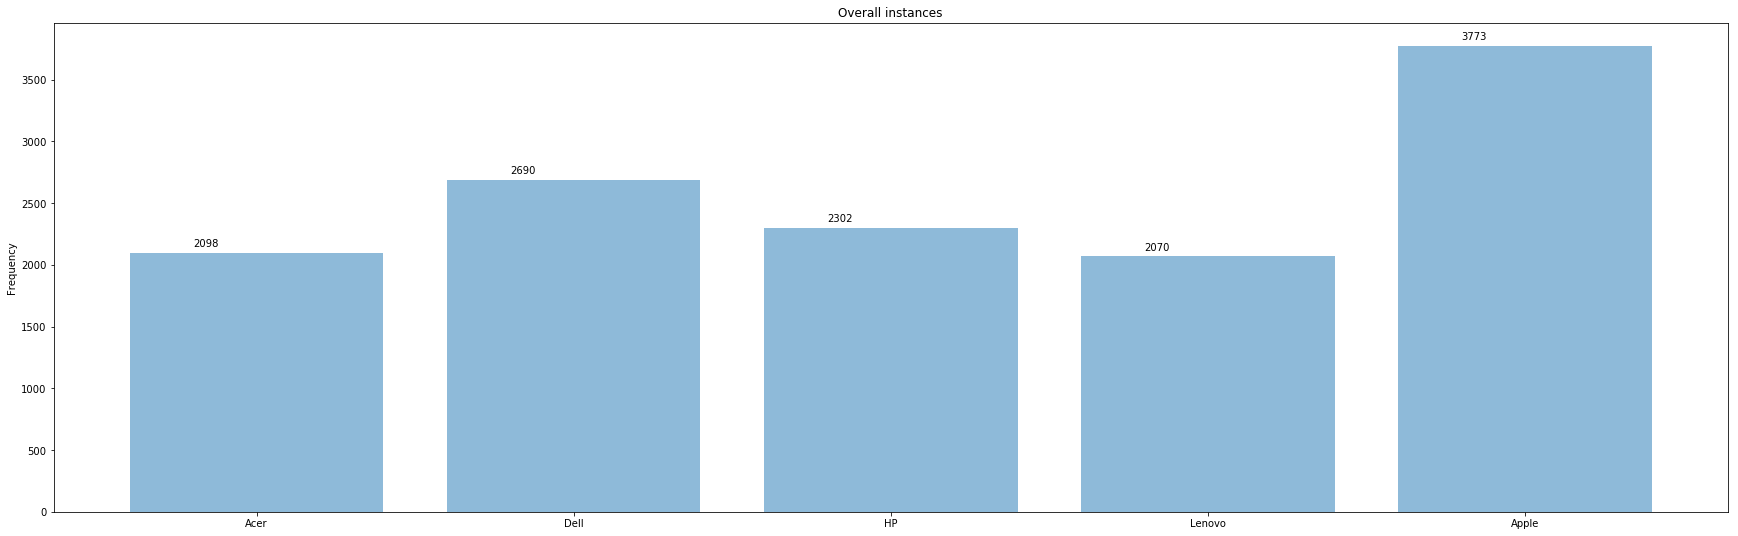

In [27]:
brands = ['Acer', 'Dell', 'HP', 'Lenovo', 'Apple']
count = [sum(isacer),sum(isdell),sum(ishp),sum(islenovo),sum(isapple)]

xpos = np.arange(len(brands))
plt.bar(xpos, count, align='center', alpha=0.5)
plt.xticks(xpos, brands)
plt.ylabel('Frequency')
plt.title('Overall instances')
for i in range(len(count)):
    plt.text(xpos[i]-0.2,count[i]+50,count[i])
plt.savefig('num_twitters_by_brands.png')
 
plt.show()

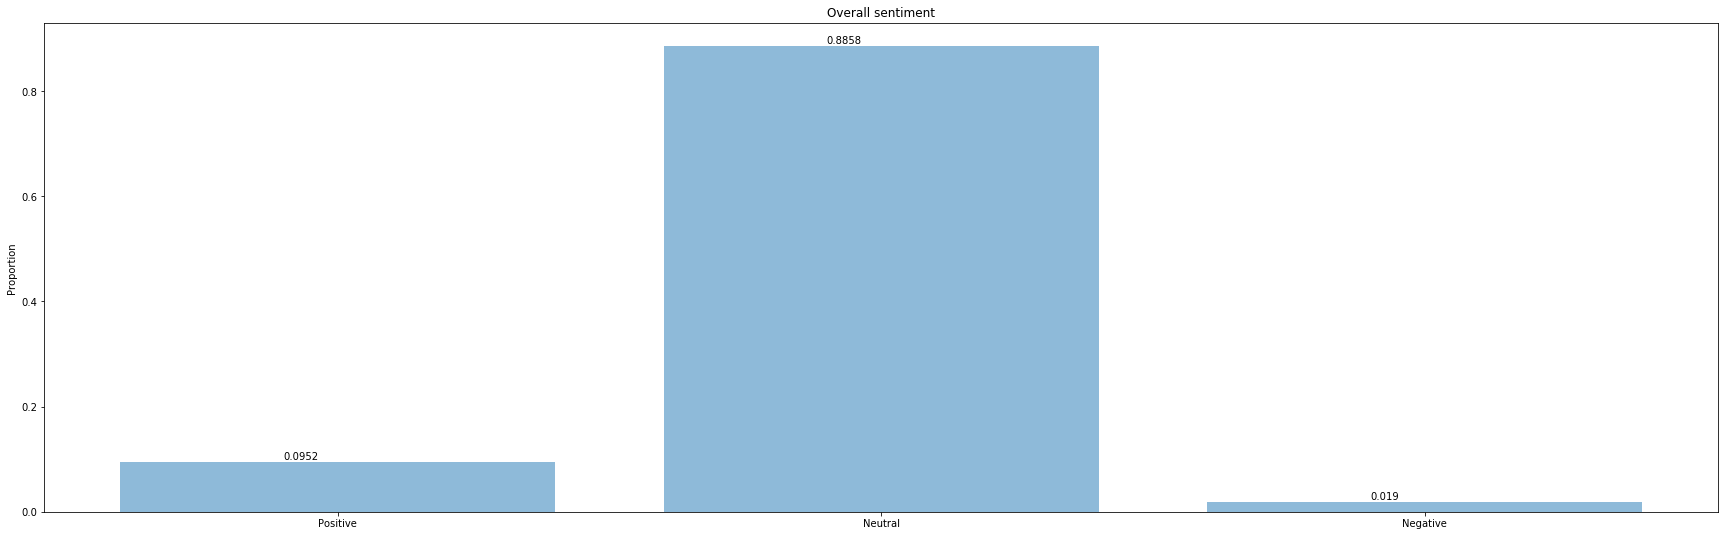

In [29]:
mylabel = ['Positive','Neutral','Negative']
count = [sstype.count('positive'),sstype.count('neutral'),sstype.count('negative')]
prob = [count[i]/sum(count) for i in range(len(count))]

xpos = np.arange(len(mylabel))
plt.bar(xpos, prob, align='center', alpha=0.5)
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('Overall sentiment')
for i in range(len(prob)):
    plt.text(xpos[i]-0.1,prob[i]+0.005,round(prob[i],4))
plt.show()

In [30]:
acerind=[i for i, j in enumerate(isacer) if j == True]
dellind=[i for i, j in enumerate(isdell) if j == True]
lenovoind=[i for i, j in enumerate(islenovo) if j == True]
hpind=[i for i, j in enumerate(ishp) if j == True]
appleind=[i for i, j in enumerate(isapple) if j == True]

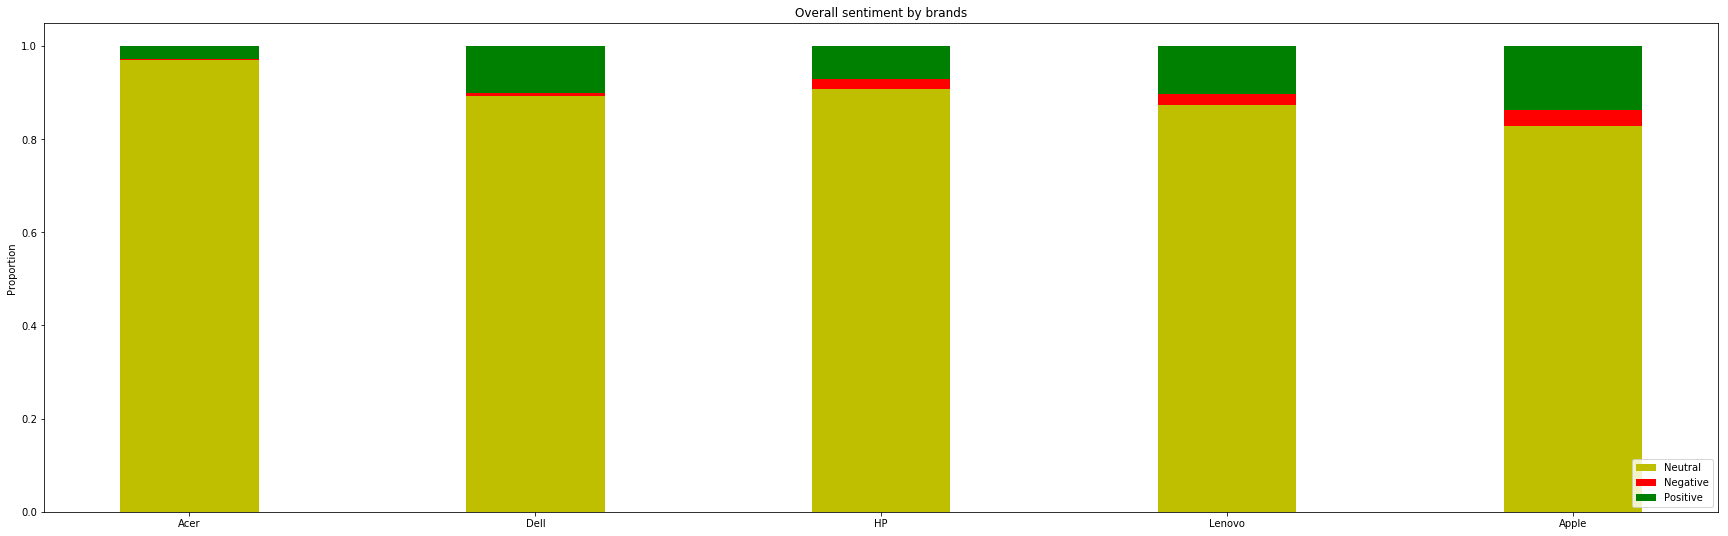

In [31]:
mylabel = ['Acer', 'Dell', 'HP', 'Lenovo', 'Apple']
countpos = [[sstype[i] for i in acerind].count('positive'),[sstype[i] for i in dellind].count('positive'),[sstype[i] for i in hpind].count('positive'),[sstype[i] for i in lenovoind].count('positive'),[sstype[i] for i in appleind].count('positive')]
countneu = [[sstype[i] for i in acerind].count('neutral'),[sstype[i] for i in dellind].count('neutral'),[sstype[i] for i in hpind].count('neutral'),[sstype[i] for i in lenovoind].count('neutral'),[sstype[i] for i in appleind].count('neutral')]
countneg = [[sstype[i] for i in acerind].count('negative'),[sstype[i] for i in dellind].count('negative'),[sstype[i] for i in hpind].count('negative'),[sstype[i] for i in lenovoind].count('negative'),[sstype[i] for i in appleind].count('negative')]
prpos = [countpos[i]/sum([countpos[i]+countneu[i]+countneg[i]]) for i in range(len(countpos))]
prneu = [countneu[i]/sum([countpos[i]+countneu[i]+countneg[i]]) for i in range(len(countneu))]
prneg = [countneg[i]/sum([countpos[i]+countneu[i]+countneg[i]]) for i in range(len(countneg))]
xpos = np.arange(len(mylabel))
width=0.4
p1 = plt.bar(xpos, prneu, width, color='y')
p2 = plt.bar(xpos, prneg, width, bottom=prneu, color='r')
p3 = plt.bar(xpos, prpos, width, bottom=[i+j for i,j in zip(prneu,prneg)], color='g')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('Overall sentiment by brands')
plt.legend(['Neutral','Negative','Positive'],loc='lower right')
plt.savefig('overall_sentimetn_by_brands.png')

plt.show()

In [32]:
df1 = [prpos, prneg, prneu]
df = pd.DataFrame(df1, columns=['Acer', 'Dell', 'HP', 'Lenovo', 'Apple'])
df.index = ['Positive','Negative','Neutral']
print(df)

              Acer      Dell        HP    Lenovo     Apple
Positive  0.027169  0.101115  0.072111  0.103865  0.138086
Negative  0.003337  0.007063  0.020851  0.023188  0.032865
Neutral   0.969495  0.891822  0.907037  0.872947  0.829049


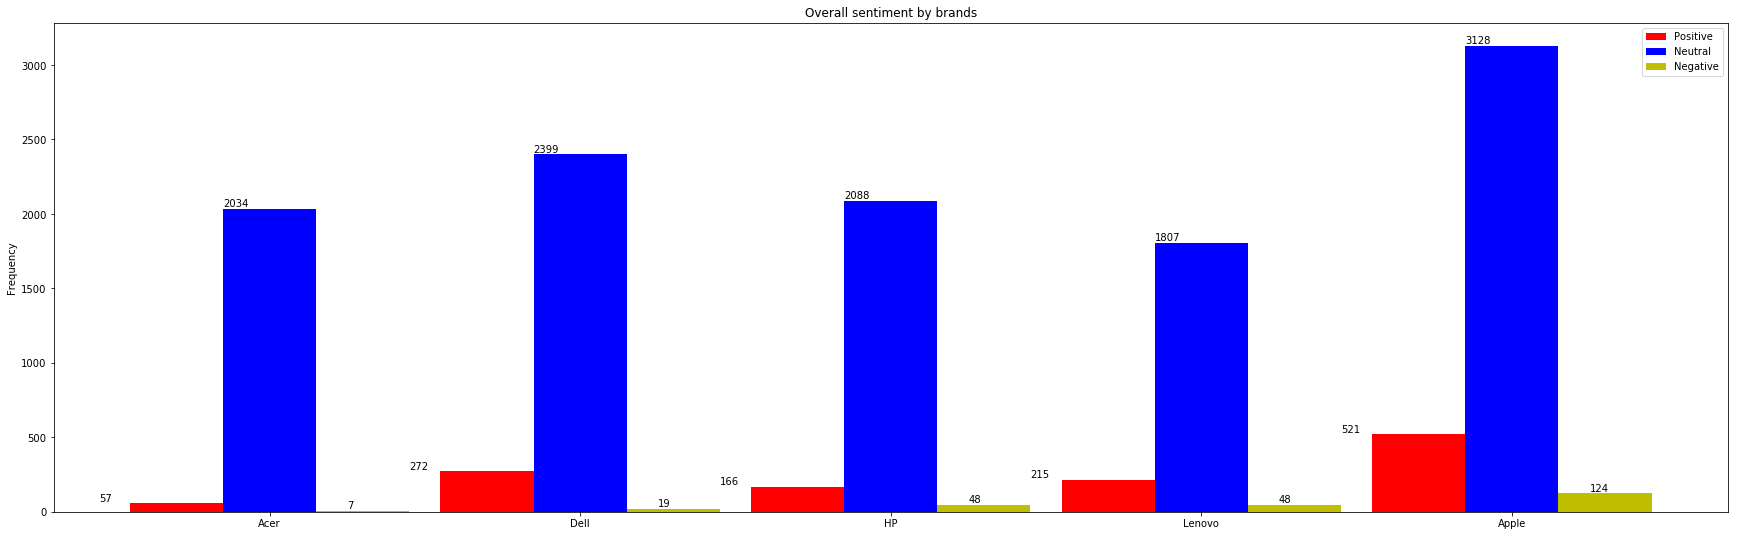

In [33]:
mylabel = ['Positive','Neutral','Negative']
brands = ['Acer', 'Dell', 'HP', 'Lenovo', 'Apple']
countpos = [[sstype[i] for i in acerind].count('positive'),[sstype[i] for i in dellind].count('positive'),[sstype[i] for i in hpind].count('positive'),[sstype[i] for i in lenovoind].count('positive'),[sstype[i] for i in appleind].count('positive')]
countneu = [[sstype[i] for i in acerind].count('neutral'),[sstype[i] for i in dellind].count('neutral'),[sstype[i] for i in hpind].count('neutral'),[sstype[i] for i in lenovoind].count('neutral'),[sstype[i] for i in appleind].count('neutral')]
countneg = [[sstype[i] for i in acerind].count('negative'),[sstype[i] for i in dellind].count('negative'),[sstype[i] for i in hpind].count('negative'),[sstype[i] for i in lenovoind].count('negative'),[sstype[i] for i in appleind].count('negative')]
xpos = np.arange(len(brands))
xposbf = xpos-width
xposaf = xpos+width
myxpos = [{i,j,k} for i,j,k in [[xposbf[l],xpos[l],xposaf[l]] for l in range(len(xpos))]]
myxpos = np.concatenate([list(myxpos[i]) for i in range(len(xpos))])
myxpos = sorted(myxpos)
width=0.3
myypos = np.concatenate([[i,j,k] for i,j,k in [[countpos[l],countneu[l],countneg[l]] for l in range(len(countpos))]])

ppos = plt.bar(xpos-width, countpos, width, color='r',align='center')
pneu = plt.bar(xpos, countneu, width, color='b',align='center')
pneg = plt.bar(xpos+width, countneg, width, color='y',align='center')
plt.xticks(xpos, brands)
plt.ylabel('Frequency')
plt.title('Overall sentiment by brands')
plt.legend(mylabel)
alist = sorted(list(set(zip([x-0.15 for x in myxpos],[y+15 for y in myypos]))))
for i in range(len(alist)):
    plt.text(alist[i][0],alist[i][1], myypos[i], color='black',fontsize=10)
    
plt.show()

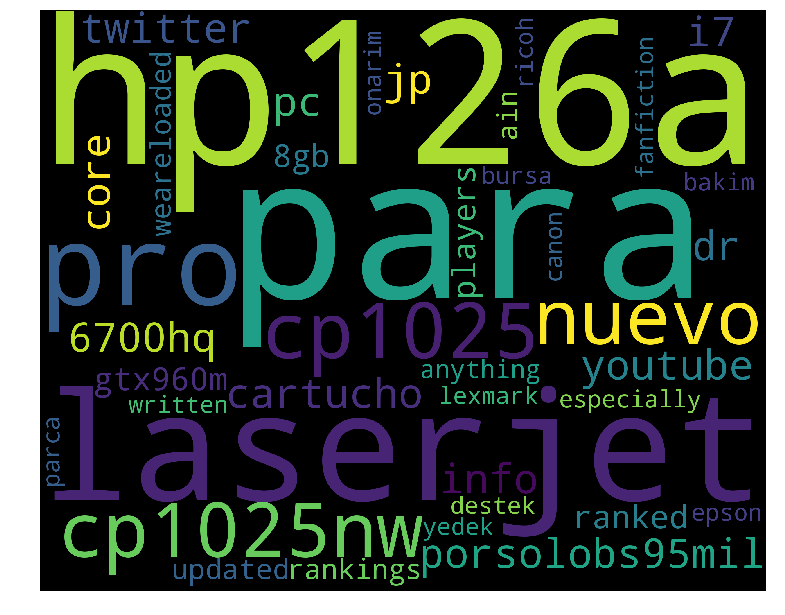

In [38]:
 # Negative Worldcould of Acer
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

sstypeacer = [sstype[i] for i in acerind]
negind=[i for i, j in enumerate(sstypeacer) if j is 'negative']
words = ' '.join(dat['text'][negind])
words = words.lower()
cleaned_word = " ".join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and not word.startswith('#')
                         and word != 'rt'
                         and word not in ['hp','angst','servis','well','toner','oferta']
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative_wordcloud_acer')

plt.show()

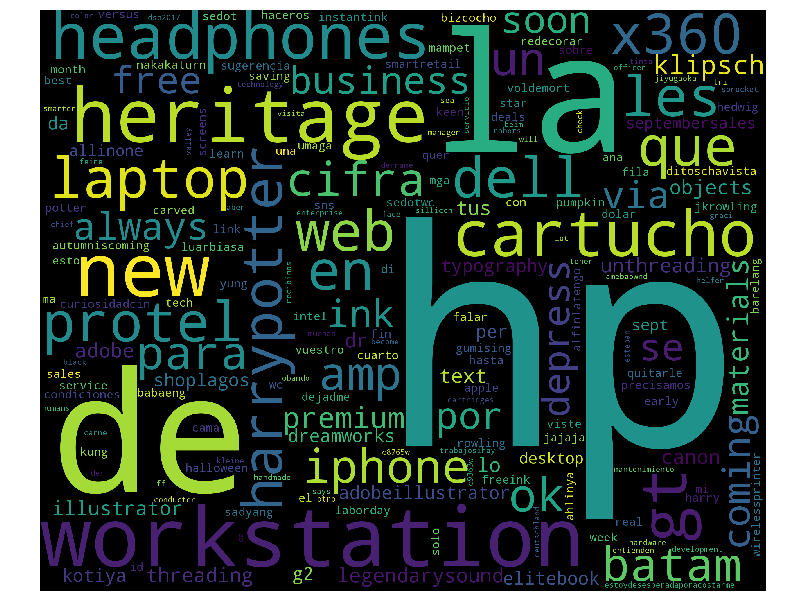

In [37]:
 # Positive Worldcould of Acer
sstypeacer = [sstype[i] for i in acerind]
negind=[i for i, j in enumerate(sstypeacer) if j is 'positive']
words = ' '.join(dat['text'][negind])
words = words.lower()
cleaned_word = " ".join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and not word.startswith('#')
                         and word != 'rt'
                         #and word not in ['apple','lenovo','hp','dell','acer','mac',
                         #                'laptop','iphone','ipad']
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('positive_wordcloud_acer')

plt.show()  

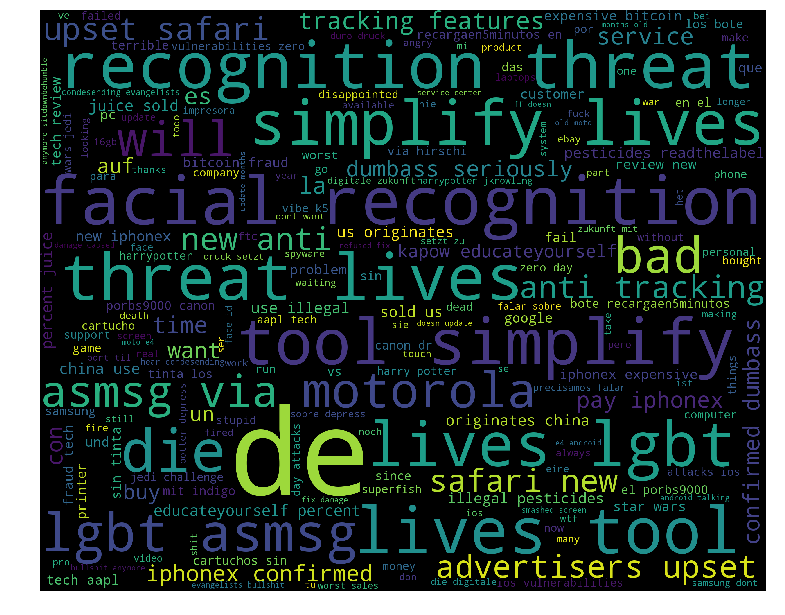

In [39]:
#overall negative wordcloud
negind=[i for i, j in enumerate(sstype) if j is 'negative']
words = ' '.join(dat['text'][negind])
words = words.lower()
cleaned_word = " ".join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and not word.startswith('#')
                         and word != 'rt'
                         and word not in ['apple','lenovo','hp','dell','acer','mac',
                                         'laptop','iphone','ipad']
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

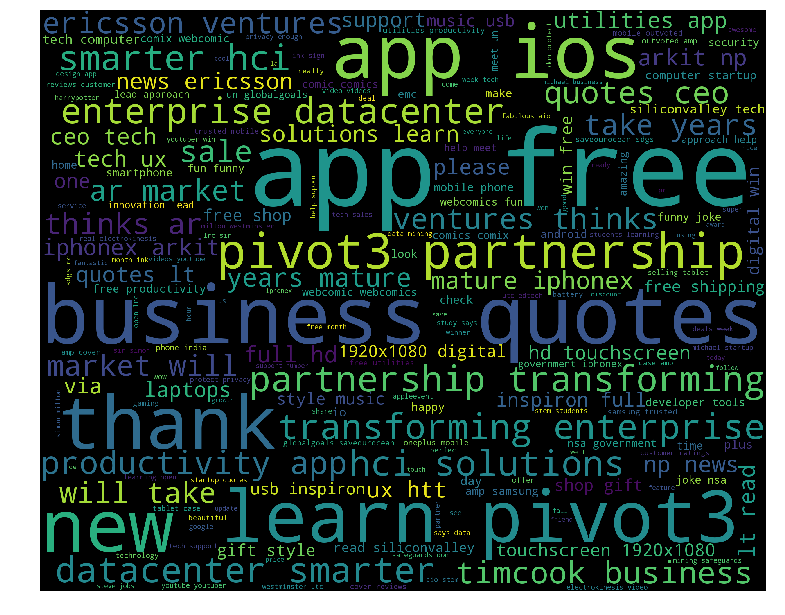

In [40]:
# Positive Wordcloud overall
posind=[i for i,j in enumerate(sstype) if j is 'positive']
words = ' '.join(dat['text'][posind])
#words = words.lower()
cleaned_word = " ".join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                         and not word.startswith('#')
                         and word != 'rt'
                         and word not in ['apple','lenovo','hp','dell','acer','mac','gt','great',
                                          'iphone','ipad','laptop','best','love']
                        ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What data you collected? 
    * Why this topic is interesting or important to you? (Motivations)
    * How did you analyse the data?
    * What did you find in the data? 
 
     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 1 Team 5

        
** Note: Each team just needs to submits one submission **

# Grading Criteria:

** Totoal Points: 120 **


---------------------------------------------------------------------------
** Notebook:  **
    Points: 80


    -----------------------------------
    Qestion 1:
    Points: 20
    -----------------------------------
    
    (1) Select a topic that you are interested in.
    Points: 6 
    
    (2) Use Twitter Streaming API to sample a collection of tweets about this topic in real time. (It would be recommended that the number of tweets should be larger than 200, but smaller than 1 million. Please check whether the total number of tweets collected is larger than 200?
    Points: 10 
    
    
    (3) Store the tweets you downloaded into a local file (txt file or json file)
    Points: 4 
    
    
    -----------------------------------
    Qestion 2:
    Points: 20
    -----------------------------------
    
    1. Word Count

    (1) Use the tweets you collected in Problem 1, and compute the frequencies of the words being used in these tweets.
    Points: 4 

    (2) Plot a table of the top 30 words with their counts 
    Points: 4 
    
    2. Find the most popular tweets in your collection of tweets
    plot a table of the top 10 tweets that are the most popular among your collection, i.e., the tweets with the largest number of retweet counts.
    Points: 4 
    
    3. Find the most popular Tweet Entities in your collection of tweets

    (1) plot a table of the top 10 hashtags, 
    Points: 4 

    (2) top 10 user mentions that are the most popular in your collection of tweets.
    Points: 4 
    
    
    -----------------------------------
    Qestion 3:
    Points: 20
    -----------------------------------
    
    (1) choose a popular twitter user who has many followers, such as "ladygaga".
    Points: 4 

    (2) Get the list of all friends and all followers of the twitter user.
    Points: 4 

    (3) Plot 20 out of the followers, plot their ID numbers and screen names in a table.
    Points: 4 

    (4) Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.
    Points: 4 
    
    (5) Compute the mutual friends within the two groups, i.e., the users who are in both friend list and follower list, plot their ID numbers and screen names in a table
    Points: 4 
  
    -----------------------------------
    Qestion 4:  Business question
    Points: 20
    -----------------------------------
        Novelty: 10
        Interestingness: 10
    -----------------------------------
    Run some additional experiments with your data to gain familiarity with the twitter data ant twitter API.  Come up with a business question and describe how Twitter data can help you answer that question.




---------------------------------------------------------------------------
** Report: communicate the results**
    Points: 20

(1) What data you collected?
    Points: 5 

(2) Why this topic is interesting or important to you? (Motivations)
    Points: 5 

(3) How did you analyse the data?
    Points: 5 

(4) What did you find in the data?
(please include figures or tables in the report, but no source code)
    Points: 5 



---------------------------------------------------------------------------
** Slides (for 10 minutes of presentation): Story-telling **
    Points: 20


1. Motivation about the data collection, why the topic is interesting to you.
    Points: 5 

2. Communicating Results (figure/table)
    Points: 10 

3. Story telling (How all the parts (data, analysis, result) fit together as a story?)
    Points: 5 

